# **CSC-40076: Design and Programming**

## **Assignment 2**
------

Completed by: **Ajantha Wirasinghe**

Keele Student number: **24027813**

date: 28/04/2024

-----------------

I have selected Jupyter Notebooks to carry out this assesment due to following facts:

cell-based notebook serve as a natural division of my code. By breaking down into cells I can organize it more effectively, add markdowns for each task, easily test, run certain cells independently and modify individual components easily.

- Breaking into cells allows me to organise it into logical units and making easier to understand.
- Each cell can focus on a specific task and with markdown could provide clarity.
- Easily I can isolate each unit for testing and easier for debug and identify any issues.
- Flexibility of run cells all at once, individually or in a different order while developing the code.
- Documentation could be well presented with detailed explanations, comments, and instructions as documentation for my code.
-  Easy to install and run as a web based application. 
  

There are 4 classes I have used here: **Book, Member, Library** and **DummySMTPServer:**

__________

#### Flow Diagram:
Before starting this project, I had an idea to develop a flow chart. With constraints in time to complete the code, I couldn't complete the task. The option is to make flow diagrams for each method and function. Most of the time has been spent on troubleshooting. While the possibilities are never-ending, the time constraints again limited such actions.

I have been able to produce for one random function **member_borrow_book()** a flow diagram. It is amazing how it shows the logic with a diagram rather than with thousands of words!.

It is a fantastic way for documentation or easy to explain for future developers.

-----

### **Book Class Documentation**

### Overview
The **Book** class is an important component of the library management system, representing individual books in the library. It includes complete details about each book, such as its identification, author, genre, and availability, which are essential for cataloging, searhing, indexing on shelves and circulation.
(Not using the data field Gender and SubGenre to simplify the data entry/testing methods where GDPR restrictions for new member details.)

### Attributes
- **book_number (str)**: The id of the book.
- **title (str)**: The title of the book.
- **author (str)**: The author of the book.
- **genre (str)**: The genre of the book.
- **publisher (str)**: The publisher of the book.
- **available (bool)**: Indicates whether the book is currently available for checkout. **True** means available, while **False** means it is currently borrowed out.

## **Methods**

### Constructor
- \_\_init__(self, book_number: str, title: str, author: str, genre: str, publisher: str)
  - Initializes a new instance of the Book class with the following parameters.
  - Parameters:
    - **book_number**: The id of the book.
    - **title**: The title of the book.
    - **author**: The author of the book.
    - **genre**: The genre of the book.
    - **publisher**: The publisher of the book.

### String Representation
- \_\_str__(self) -> str
  - Returns a string representation of the book, including its title, author, book number, genre, and publisher.
  - Useful for quickly printing book details in a readable format.

### Barcode Scanner
- **scan(cls, barcode_or_book_number, books)**
  - Class method that decodes the barcode or book number and retrieves the corresponding book number from the provided dictionary of books.
  - This method supports two input formats:
    - Barcoded format: **barcode-xxx** or **Book number** as a manual entry


In [1]:
import csv
import json
import random

class Book:
    """
    A class representing a book in the library.

    Attributes:
        book_number (str): The id of the book.
        title (str): The title of the book.
        author (str): The author of the book.
        genre (str) : The genre of the book
        publisher (str) : The publisher of the book
        available (bool): Whether the book is currently available for checkout.

    Methods:
        __init__(self, isbn: str, title: str, author: str, genre: str, publisher: str)
        scan(cls, barcode: str) -> str
        __str__(self) -> str
    """

    def __init__(self, book_number: str, title: str, author: str, genre: str, publisher: str):
        """
        Initializes a new instance of the Book class.

        Parameters:
            book_number (str): The book number.
            title (str): The title of the book.
            author (str): The author of the book.
            genre (str): The genre of the book.
            publisher (str): The publisher of the book.
        """
        self.book_number = book_number
        self.title = title
        self.author = author
        self.genre = genre
        self.publisher = publisher
        self.available = True
    
    def __str__(self) -> str:
        """
        Returns a string representation of the book.

        Returns:
            str: A string representation of the book, including its title, author, book number, genre and publisher.
        """
        return f"Book Number: {self.book_number}\nTitle: {self.title}\nAuthor: {self.author}\nGenre: {self.genre}\nPublisher: {self.publisher}\n"

   # explantion as above, markdown:
    @classmethod
    def scan(cls, barcode_or_book_number, books):
        """
        Decodes the barcode or book number and retrieves the corresponding book number from the given dictionary.
    
        This method checks if the input string starts with 'barcode-', indicating a barcode format. It then extracts
        and returns the book number. If the input does not start with 'barcode-', it is assumed to be
        a direct book number in which case considered as a manual barcode scanning or in the real life scenario 'barcode didnt scan'
    
        Parameters:
            barcode_or_book_number (str): The scanned ID of the book, which could either be a barcode (e.g., 'barcode-123')
                                          or a direct book number (e.g., '123').
            books (dict): A dictionary containing book numbers as keys and Book objects as values.
    
        Returns:
            str: The book number if found in the books dictionary.
            None: If the book number is not found or if there is an error in processing the input.
    
        Raises:
            ValueError: If there's an issue processing the barcode or book number (currently caught and None is returned).
        """
        try:
            if barcode_or_book_number.startswith("barcode-"):
                _, scanned_book_number = barcode_or_book_number.split("-")
                return scanned_book_number
            else:
                return barcode_or_book_number
        except ValueError:
            return None
     




----------
The Book class is critical for managing the catalog of books in a library system. It allows for easy tracking and management of books' availability, essential for both in-house operations and customer-facing services. The barcode scanning functionality provides an automated extracting of member details or book details from the system which facilitates quick book identification and processing, crucial in a busy library setup where efficiency is key.

* This class structure not only supports basic library operations but also offers a foundation for further expansion, such as integration with digital catalog systems or advanced inventory management solutions.

**Future Development**
Further enhancements could include:

- Integration with RFID systems for faster checkout and return processes.
- Expansion of the barcode scanning method to support more complex formats or integration with external barcode scanning hardware.
- Advanced search and filter methods to accommodate complex queries, such as searching by multiple fields or keywords.
- Add more categories or parameters/attributes.

By continuing to evolve the **Book** class functionalities, libraries can significantly enhance operational efficiency and user experience.

----------
### **<u>Documentation for some selected Metods:</u>**


-------------
#### **scan()** method:

It is a method in class Book, however we have to pass the 'book' dictionary to the **scan()** method to in order for it check if the scanned book numbers are exisiting in the dictionary.

**scan()** method accept the 'books' dictionary as an argument and then modify the call accordingly.

This method split the string (barcode) by "-" and return the second part by throwing away the first part. This is a simulation which symbolizes a real-life barcode decoding and deriving the information from the barcode or decoding it. With 'else' clause I have included to simulate the manual scanning of the number which is also included in any real-life scanning user interfaces. In this instance I used just the short form of the barcdoe, which is the book number.


**scan() is a class method. It returns the book number.**

- @classmethod: It defines a method that, operates on the whole class itself rather than on an instance of the class. It takes the following 'cls' which refers to the class itself which allows the method to access class-level variables and methods.
- 'cls' refers to the class 'Book'. Also, it can be any name instead of 'cls' but is used by convention.
- 'barcode_or_book_number': This is a input parameter to the method, represent the book. 
-   'book': This parameter is dictionary which contains book numbers as keys and 'Book' object as values. it used to look up values.
-  Decodes the barcode or book number as input and returns the corresponding book number
- _ , scanned_book_number = barcode_or_book_number.split("-"): '-' splits the input string into two and '_' indicates in Python part of the variable thats not going to be used. In this case it will ignore the part "barcode-" and extract the book number.
- ValueError will return when the input string is cant be split.
  

________

# **class Member:**



## **Member Class Documentation**

### Overview
The **Member** class represents an individual library Member, encapsulating all related data and operations that can be performed on a library member's account. This includes managing loans, calculating fines, and handling book borrowings and returns.

### Attributes
- **member_id** (str): A unique identifier for the member.
- **first_name** (str): The first name of the member.
- **last_name** (str): The last name of the member.
- **email** (str): The email address of the member.
- **membership_card** (str): The membership card number associated with the member.
- **fines** (float): Current outstanding fines for the member in pounds.
- **borrowed_books** (list): A list of books currently borrowed by the member.
- **loans** (dict): A dictionary storing details of the member's current and past loans.

### Constructor
The constructor initializes a new instance of the **Member** class with specified personal details, fines, and membership information.


def \_\_init__(self, member_id, first_name, last_name, email, fines, membership_card):

    self.member_id = member_id
    self.first_name = first_name
    self.last_name = last_name
    self.email = email
    self.fines = fines
    self.membership_card = membership_card
    self.borrowed_books = []
    self.loans = {}


**Documentation for selected methods are given at the bottom of the class**

--------------

In [2]:

import datetime
from datetime import datetime  # This allows you to use datetime.strptime() directly

class Member:
    """
    A class representing a member of the library.

    Attributes:
        member_id (str): The unique ID of the member.
        first_name (str): The first name of the member.
        last_name (str): The last name of the member.
        email (str): The email address of the member.
        membership_card (str): The membership card number of the member.
        fines (float): The amount of the member's outstanding fines.
    """

    def __init__(self, member_id: str, first_name: str, last_name: str, email: str, fines: float, membership_card: str):
        """
        Initializes a new Member object.

        Parameters:
            member_id (str): The ID number of the member.
            first_name (str): The first name of the member.
            last_name (str): The last name of the member.
            email (str): The email address of the member.
            fines (float): The amount of fines owed by the member.
            membership_card (str): The membership card number of the member.
        """
        self.member_id = member_id
        self.first_name = first_name
        self.last_name = last_name
        self.email = email
        self.fines = fines
        self.membership_card = membership_card
        self.borrowed_books = []
        self.loans = {}

    def __str__(self) -> str:
        """
        Returns a detailed string representation of the Member object, formatted for readability. The output includes
        the member's unique identifier, membership number, full name, email address, list of borrowed books (with titles,
        genres, and authors), and any outstanding fines.
    
        Returns:
            str: A string that combines the member's ID, membership number, name, email address, a formatted list of borrowed
                 books, and outstanding fines into a well-structured summary in easier to read format.
        """
        books_borrowed_str = []

        for book in self.borrowed_books:
            books_borrowed_str.append(f"\t{book.title}, {book.genre} by {book.author}\t\n")

        return (f"\n\tMember ID: ('{self.member_id}')\n\tMembership Number: ('{self.membership_number}')\n\tName: ('{self.first_name} {self.last_name}')\nEmail: ('{self.email}')\nBorrowed Books:\n\t" +
                '\n\t'.join(books_borrowed_str) +
                f"\nOutstanding Fines: {self.fines}")

      
    def borrowed_books_list(self):
        """
        Compiles a formatted string containing information about all currently borrowed books by the member.
    
        Returns:
            str: A formatted string listing each borrowed book's title and author.
        """
        
        books_borrowed_str = "\tBooks borrowed so far:\n"
        for book in self.borrowed_books:
            books_borrowed_str += f"\t\t{book.title} by {book.author}\n"
        return books_borrowed_str    


    def add_borrowed_book_to_list(self, book: Book) -> None: # adds the borrowed books into the borrowed_books[] list, returns none
        """
        Adds a borrowed book to the member's borrowed books record.
    
        Parameters:
            book (Book): The book object being borrowed.
        """
        self.borrowed_books.append(book)

    def remove_borrowed_book_from_list(self, book: Book) -> None:  
        """
        Removes a returned book from the member's borrowed books record.
    
        Parameters:
            book (Book): The book object being returned.
        """
        self.borrowed_books.remove(book)


    def to_dict(self):
        """
        Converts the Member object into a dictionary format suitable for JSON serialization, including all its attributes and
        a list of borrowed books represented as dictionaries.
    
        Returns:
            dict: A dictionary representation of the Member object, including member details and serialized borrowed books.
        """
        return {
            "member_id": self.member_id,
            "first_name": self.first_name,
            "last_name": self.last_name,
            "email": self.email,
            "membership_card": self.membership_card,  # Corrected attribute name
            "fines": self.fines,
            "borrowed_books": [book.__dict__ for book in self.borrowed_books]  # Serialize borrowed books attributes
        }


    def issue_new_membership_card(self):
        """
        Issue a new membership card to a new member.

        Returns:
            tuple: A tuple containing the newly issued membership card number and the member details.
        """
        card_number = f"{self.member_id}_1"  # Issue card number in the format memberID_1
        self.membership_card = card_number
        return card_number, self.first_name, self.last_name, self.email


    def reissue_membership_card(self) -> str:
        """
        Reissues the membership card for a member by incrementing the issue number of the card.
        The card number is composed of the member ID and an issue number, separated by a dash (e.g., 'member_id-2').
        
        The issue number increments with each reissue until it reaches 99. After 'member_id-99', it resets back to 1.
        
        Returns:
            str: The new membership card number after reissuing. This reflects the incremented or reset issue number.
        """
        current_card_number = self.membership_card.split("-") # membership number is split with the str "-"
        member_id = current_card_number[0] # The first part, after splitting
        current_issue_number = int(current_card_number[1]) # The second part, after splitting 
        
        if current_issue_number >= 99: # the condition for issue number is set for, if '99' or more will be reset to '1'
            new_issue_number = 1
        else:
            new_issue_number = current_issue_number + 1
        
        new_membership_card = f"{member_id}-{new_issue_number}"
        self.membership_card = new_membership_card  # Update membership card number in the Member object
        return new_membership_card


    
    @classmethod
    def scan(cls, barcode_or_member_number, members):
        """
        Decodes the barcode or member number and returns the corresponding member details from the given dictionary.
    
        This method checks if the input string contains a hyphen ('-'), assuming it's a membership card number if true,
        and a member number if false. It retrieves the member from the dictionary if found.
    
        Parameters:
            barcode_or_member_number (str): The scanned ID of the book or member, which could be a membership card number
                                            (e.g., '123-1') or a direct member number (e.g., '123').
            members (dict): A dictionary containing member numbers as keys and Member objects as values.
    
        Returns:
            dict: A dictionary containing member details ('member_number', 'name', 'email', 'membership_card') if found.
            None: If no member is found with the provided ID.
    
        Raises:
            ValueError: If there's an issue processing the barcode or member number (currently caught and None is returned).
        """
        
        try:
            if '-' in barcode_or_member_number:
                member_number, _ = barcode_or_member_number.split("-")
                member = members.get(member_number)
                if member:
                    # Return member details
                    return {
                        'member_number': member_number,
                        'name': f"{member.first_name} {member.last_name}",
                        'email': member.email,
                        'membership_card': member.membership_card
                    }
                else:
                    return None
            else:
                # Assume it's a member number directly
                member = members.get(barcode_or_member_number)
                if member:
                    # Return member details
                    return {
                        'member_number': barcode_or_member_number,
                        'name': f"{member.first_name} {member.last_name}",
                        'email': member.email,
                        'membership_card': member.membership_card
                    }
                else:
                    return None
        except ValueError:
            return None



    def excel_to_date(self, excel_date):
        """
        Converts an Excel date integer to a Python datetime object.
        """
        if excel_date == 0:
            return datetime.now()  # Return current date if excel_date is 0 or invalid
        excel_epoch_start = datetime.datetime(1899, 12, 30)
        return excel_epoch_start + datetime.timedelta(days=int(excel_date))


    def calculate_fines(self):
        """
        Calculates the total fines for all loans in the library system based on their due dates and return dates.
        This method iterates through each loan in the `loans` dictionary, checks the return date against the due date,
        and applies a fine for each day the loan is late after a 14-day grace period.
    
        The fine is calculated as £5 per day for each day the loan item is returned late.
    
        Returns:
        float: The total amount of fines calculated for all late loans.
        """
        total_fine = 0
        for loan in self.loans.values():
            if 'date_of_loan' in loan and 'date_of_return' in loan:  # Ensure the necessary dates are present
                loan_date = datetime.strptime(loan['date_of_loan'], '%Y-%m-%d')
                return_date = datetime.strptime(loan['date_of_return'], '%Y-%m-%d')
                late_days = max((return_date - loan_date).days - 14, 0)
                fine = late_days * 5
                total_fine += fine
    
        return total_fine

    
    def member_return_book(self, book_number: str, loans_filename: str):
        """
        Updates the loan records to mark a book as returned and calculates fines if the return is late. 
    
        This method modifies the loan record for a given book, setting the return date to the current date.
        It then writes the updated records back to a JSON file and calculates any fines due based on the
        loan period and return date.
    
        Parameters:
            book_number (str): The number of the book being returned.
            loans_filename (str): The filename of the JSON file containing loan records for all members.
    
        Returns:
            float or str: The total fine amount for late returns if the book is found in the member's loan records,
                          otherwise returns a message indicating that the book was not found.
    
        Remarks:
            Updates the JSON file with the current loan records including the return date.
            This method may raise a FileNotFoundError if the JSON file cannot be opened, or a JSONDecodeError
            if the file content cannot be parsed.
        """
        if book_number in self.loans:
            loan = self.loans[book_number]
            if 'date_of_return' not in loan:  # Only set return date if not already returned
                loan['date_of_return'] = datetime.now().strftime('%Y-%m-%d')
                self.loans[book_number] = loan  # Update the loan record

                # Save updated loans to the JSON file
                with open(loans_filename, 'w') as loans_file:
                    json.dump({self.member_id: self.loans}, loans_file)

            fine = self.calculate_fines()
            return fine
        else:
            return "Book not found in member's loan records."



    def assign_loans_to_members(self, loans):
        """
        Assigns loan records to the appropriate members within the library based on the loaded data.
    
        Parameters:
            loans (list of dict): A list of loan dictionaries.
        """
        for loan in loans:
            member_id = loan['member_number']
            loan_key = f"{loan['book_number']}-{loan['date_of_loan']}"
    
            if member_id in self.members:
                member = self.members[member_id]
                member.loans[loan_key] = loan  # Directly assign the loan using the constructed key
            else:
                print(f"Warning: Member ID {member_id} not found in library members.")



-----------
### **<u>Documentation for some selected methods in Member Class:</u>**

---------

#### **__ __str__ __(self):**

***Method in the Member Class:***

Characteristics of .join() in this method is that it is a string method in Python used to concatenate a list of strings into a single string with a specified separator. It is called on a string (or separator) and iterates through its argument, which must be iterable of strings, combining them into one string. This method is efficient for concatenating multiple strings, especially when the number of strings is unknown beforehand or variable, as it is more efficient than using repeated concatenation with +.

----------------

#### **to_dict():**

**Method in the Member Class:**

The ***to_dict()*** method of the Member class is designed to convert the state of a Member object into a dictionary format. This format is particularly useful for JSON serialization, which facilitates easy data storage or transmission, saving to files.

* This method is crucial for integrating the Member class within systems that require data interchange in a structured format like JSON. By providing a method to serialize the member data, the class enhances interoperability and ease of data handling.

* Serialization of Borrowed Books: Each borrowed book is also converted to a dictionary. This recursive serialization ensures that all related data can be comprehensively captured in a single dictionary object.
  
* Typical use cases include saving the member data to a database or file in JSON format.
  
* This method's implementation is a standard practice in software development, allowing object attributes to be easily accessed or manipulated outside of traditional object methods and preserving data integrity during operations such as data transfer or persistence.nce.

----------

#### **scan()**
The scan method in the Member class is a class method designed to interpret or simulate the scanning of barcodes of membership cards or member numbers (as a manual entry) to identify library members.

* The method uses a class method (@classmethod) to enable it to be called on the class itself, not on instances of the class. This is suitable for operations like scanning barcodes which are generally utility functions and not tied to a specific object instance.

* Input Handling: It intelligently differentiates between a membership card number and a direct member number based on the presence of a hyphen, making it versatile in its application.
  
* Error Handling: The method includes robust error handling that gracefully returns **None** if errors occur during the processing of the input, ensuring that the system remains stable even if unexpected input formats are encountered.
  
* This method is vital for systems where a quick identification of members through various types of ID inputs is necessary, such as in library check-out systems or access control or when payments are made.

-----------------

#### **member_return_book():**
This method in the Member class manages the return of borrowed books. It updates the loan records to reflect the return of a book and calculates any applicable fines based on the loan duration and return date. The fine is based on the total fines due by the member.

* This method updates the loan record of a returned book (setting the current date as the return date and).
* For demonstration purposes only, the fines due for late returns are calculated based on stored details in the "bookloans" dates of loaned out date and due date. The actual today() date when returning is not taken into consideration as it was not a part of the requirement in this assessment. In the future implementation of the project, it is straightforward to add another function to calculate the fine reference to a particular book at the time of return. 
* It also saves the updated loan information back to a JSON file.
* Error Handling: It handles errors related to file access and data formatting gracefully, providing clear feedback on what might have gone wrong.
* Data Integrity: By checking if the return date is already set, it ensures that the book cannot be returned more than once, preserving the integrity of the loan data, until the Kernel is reset or rerun the entire code.
* This method is crucial for managing the return process of books in library systems, ensuring that all aspects of a book's return are accurately recorded and any financial penalties for late returns are appropriately applied.
* The output shows members' details, book details, and total fines by the member.


---------------

## **class DummySMTPServer:**

This class will serve as handling notifications, emails, SMS etc. with provisions to develop further. You may say it is a virtual 'Message Server'. 

## **DummySMTPServer Class Documentation**

### Overview
The **DummySMTPServer** class provides a simulation of an SMTP (Simple Mail Transfer Protocol) server for development and testing purposes. It is designed to help developers test the email sending functionality of applications without the need to connect to an actual SMTP server or a network, which simplifies debugging and testing by containing all operations locally. Also avoiding unnecessary network activity and the risks of sending unintended emails during testing.
Testing with actual servers may cause havoc as those messages will be detected as spam, a waste of network resources, and cause additional traffic in the network. There are third-party companies that provide dummy SMTP servers for developers.


### Attributes
- **sent mails** (list): Stores a simulated "sent" folder containing all emails that have been "sent" by the server during testing.

### Constructor

def \_\_init__(self):

    """
    Initializes a new instance of the DummySMTPServer, setting up an empty list to capture sent emails.
    """
    self.sent_emails = []


------

In [3]:
class DummySMTPServer:
    """
    A dummy SMTP server used for testing, allowing developers to simulate the sending and receiving of emails
    without actual network activity. It captures emails sent during tests in a simulated 'sent' folder.

    Attributes:
        sent_emails (list): A list that acts as a 'sent' folder, storing emails.
    """

    def __init__(self):
        """
        Initializes the DummySMTPServer with an empty list to store sent emails.
        """
        self.sent_emails = []

    def outbox(self, from_address: str, to_address: str, msg: str):
        """
        Simulates sending an email by appending it to the sent_emails list.

        Parameters:
            from_address (str): The sender's email address.
            to_address (str): The recipient's email address.
            msg (str): The message of the email.
        """
        self.sent_emails.append({'from': from_address, 'to': to_address, 'msg': msg})

    def print_sent_emails(self):
        """
        Prints all the emails that have been 'sent', displaying sender, recipient, and message for each.
        """
        for email in self.sent_emails:
            print("From: {}".format(email['from']))
            print("To: {}".format(email['to']))
            print("Message: {}".format(email['msg']))
            print("-------------------end of line--------------------")


    
    def quit(self):
        """
        Placeholder method to simulate closing the connection to the SMTP server.
        """
        pass


--------

#### **Possible Future Development:**
The DummySMTPServer class could be enhanced with features to make it more versatile in testing scenarios:

* Network Simulation: Add the capability to simulate network delays and errors, allowing developers to test how their application handles such situations.
* Authentication and Security Tests: Integrate simulated authentication processes to test security protocols related to email sending.
* Integration with Testing Frameworks: Provide built-in or third-party support for popular testing procedures to automatically log and manage sent emails within test cases.
* Configurable Responses: Allow the dummy server to provide configurable responses to sending attempts, enabling testing of various server response scenarios.
* Real-time Interaction Simulation: Simulate interactions with real-time systems by queuing and processing 'sent' emails or SMS.
* By evolving along these lines, the DummySMTPServer can offer a more comprehensive testing tool that can handle a wider range of scenarios, aiding developers in producing robust, fault-tolerant applications.

--------------

## **class: Library**

## **Library Class Documentation**

### Overview
The **Library** class represents a library system that manages a collection of books and membership records. It allows for the management of book loans, member registrations, and book reservations, and includes functionality to handle late return fines.

### Attributes

- **name**(str): The name of the library or the branch.
- **books** (dict): A dictionary mapping book numbers to **Book** objects.
- **members** (dict): A dictionary mapping member IDs to **Member** objects.
- **loans** (list): A list to store the details of book loans.
- **reserved_books** (dict): A dictionary to manage book reservations.

### Constructor

def \_\_init__(self, name: str):

    """
    Initializes a new Library instance with a specified name and empty collections for books and members.
    """
    self.name = name
    self.books = {}
    self.members = {}
    self.loans = []
    self.reserved_books = {}lf.reserved_books = {}


### Methods
- **\_\_init__(self, name: str)**: Initializes the Library with the specified name and prepares structures for books, members, loans, and reservations.
- **\_\_str__(self)**: Provides a formatted string representation of the library, including details of books, members, and loans.
- **add_book(self, book: Book)**: Adds a book to the library's catalog.
- **add_member(self, member: Member)**: Registers a new member in the library's system.
- **borrow_book(self, member_id: str, book_number: str) -> bool**: Checks out a book to a member if it is available.
- **return_book(self, member_id: str, book_number: str)**: Processes the return of a book, updating its availability and the member's record.
- **collect_payment(self, member: Member, amount: float)**: Processes payments of fines from members.
- **find_member_details(self, member_id: int) -> Member**: Retrieves and returns a member's details by their ID.
- **on_shelf(self) -> str**: Lists books currently available on the shelves.
- **initialize_library_with_loans(self, loans_filename)**: Initializes library loans from a specified JSON file and updates member records accordingly.

  


#### Usage
The Library class is used to simulate a library management system in a software environment, allowing for the addition and management of books and members, handling loans and returns, and managing reservations. This class can be extended or modified to integrate with real database systems or to enhance functionality with new features such as overdue fine calculations or more complex reservation handling.

-----

##### Documentation for selected methods are given at the end of class methods

In [4]:

from tabulate import tabulate

class Library:
    """
    A class representing a library.

    Attributes:
        name (str): The name of the library or the branch name.
        books (dict): A dictionary of books objects with the ISBN as the key.
        members (dict): A dictionary of Member objects with the unique member ID as the key.

    Methods:
        __init__(self, name: str)
        find_member_details(self, member_id: int) --> Member
        on_shelf(self) -> str
        add_book(self, book: Book) -> None
        add_member(self, member: Member) -> None
        borrow_book(self, member_id: str, book_number: str) -> bool
        return_book(self, member_id: str, book_number: str) -> None
        collect_payment(self, member: Member, amount: float) -> None
    """

    def __init__(self, name: str):
        """
        Initializes a new instance of the Library class.

        Args:
            name (str): The name of the library.
        """
        self.name = name
        self.books = {}  # Dictionary to store books
        self.members = {}  # Dictionary to store members
        self.loans = []  # List to store book loans
        self.reserved_books = {}  # Dictionary to store reserved books and their queues
          

    def __str__(self):
        """
        Generates a string representation of the library including listings of all books, available books,
        all members, and all loans using the tabulate module for formatted tables. This method is optimized
        for handling large datasets by using lists to compile the information before converting them into
        a string format.
    
        Returns:
        str: A formatted string representing various sections of the library (all books, available books,
             all members, all loans).
        """

        # Using lists to store book and member information before joining them into a string instead of using a 'string'.
        # This is to optimize performance as a used case scenario. It is useful when dealing with big datasets.
    
        all_books_str = []
        for book_number, book in self.books.items():
            all_books_str.append([book_number, book.title, book.genre, book.author, book.publisher])
    
        available_books_str = []
        for book_number, book in self.books.items():
            if book.available:
                available_books_str.append([book_number, book.title, book.genre, book.author, book.publisher])
        
        all_members_str = []
        for member_id, member in self.members.items():
            all_members_str.append([member_id, member.first_name, member.last_name])

        all_loans_str = []
        for loan in self.loans:
            all_loans_str.append([loan['book_number'], loan['member_number'], loan['date_of_loan'], loan['date_of_return']])

        # Print out the tables with headings
        
        return (
            f"Library('{self.name}')\n\n" +
            f"All Books:\n{tabulate.tabulate(all_books_str, headers=['Book Number', 'Title', 'Genre', 'Author', 'Publisher'], tablefmt='plain', colalign=('left',))}\n\n" +
            f"Available Books:\n{tabulate.tabulate(available_books_str, headers=['Book Number', 'Title', 'Genre', 'Author', 'Publisher'], tablefmt='plain', colalign=('left',))}\n\n" +
            f"All Members:\n{tabulate.tabulate(all_members_str, headers=['Member ID', 'First Name', 'Last Name'], tablefmt='plain', colalign=('left',))}\n\n" +
            f"All Loans:\n{tabulate.tabulate(all_loans_str, headers=['Book Number', 'Member Number', 'Date of Loan', 'Date of Return'])}"
        )

    def initialize_library_with_loans(library, loans_filename):
        loans = load_loans_from_json(loans_filename)
        library.assign_loans_to_members(loans)
        for member_id, member in library.members.items():
            fines = member.calculate_fines()  # Recalculate fines after loading loans
            print(f"Member ID {member_id} has loans: {member.loans} and fines: £{fines:.2f}")
    
  
    def assign_loans_to_members(self, loans):
        """
        Assigns loan records to the appropriate members within the library.
    
        Args:
            loans (list of dict): A list of loan dictionaries containing all necessary loan details.
        """
        for loan in loans:
            member_id = loan['member_number']
            if member_id in self.members:
                self.members[member_id].loans[loan['loan_id']] = loan
                print(f"Assigned loan {loan['loan_id']} to member {member_id}")
            else:
                print(f"Warning: Member ID {member_id} not found in library members.")

   
        
    def update_json_files(self):
        # Logic to update JSON files
        pass
    
   
    def add_member(self, member_id, first_name, last_name, email):
        """
        Adds a new member to the library's member dictionary and updates the library name to reflect this addition.
    
        Parameters:
        member_id (str): The unique identifier for the new member.
        first_name (str): The first name of the new member.
        last_name (str): The last name of the new member.
        email (str): The email address of the new member.
    
        Remarks:
        - Adds a new member to the members dictionary.
        - Updates the library name by invoking the update_library_name method.
        """
        # Add member to the library
        self.members[member_id] = Member(first_name, last_name, email)
        # Update the library name after adding a member
        self.update_library_name()
    
   
    def update_library_name(self):
        """
        Updates the library name based on the names of the members in the library. The new library name is
        a concatenation of the names of all members.
    
        Remarks:
        - Modifies the 'name' attribute of the library instance to include all member names.
        """
        # Update the library name based on member names
        self.name = ", ".join([f"{member.first_name} {member.last_name}" for member in self.members.values()])
    
   
    def print_library_info(self):
        """
        Prints the current information of the library, including the library name, details of all members,
        and a list of all books.
    
        Remarks:
        - Prints library, member, and book details to the console.
        """
        print(f"Library Name: {self.name}")
        print("Members:")
        for member_id, member in self.members.items():
            print(f"  Member ID: {member_id}, Name: {member.first_name} {member.last_name}, Email: {member.email}")
        print("Books:")
        for book_id, book in self.books.items():
            print(f"  Book ID: {book_id}, Title: {book.title}, Author: {book.author}")
    
   
    def scan_book(self, barcode):
        """
        Scans a book by its barcode and retrieves details from the library's books collection.
    
        Parameters:
        barcode (str): The barcode of the book to scan.
    
        Returns:
        str: Details of the book retrieved based on the barcode.
    
        Remarks:
        - Prints the details of the scanned book to the console.
        """

        # scan a book with scan() method
        book_details = Book.scan(barcode, self.books)
        print(book_details)    

        
    def find_member_details(self, member_id: str) -> Member:
        """
        Search and retrieve a member's details using the member class from records.

        Args:
            member_id (str): The ID of the member to retrieve from member class.

        Returns:
            Member: The Member object corresponding to the provided member ID.
        """
        return self.members.get(member_id)


    
    def on_shelf(self) -> str:
        """
        Generates a string listing all books currently available on the library's shelves.

        Returns:
            str: A string listing the titles of all available books.
        """
        available_books = [book for book in self.books.values() if book.available]
        if available_books:
            return "\n".join([f"{book.title} by {book.author}" for book in available_books])
        else:
            return "There are no available books at the moment."

        
    def add_book_to_shelf(self, book: Book) -> None:
        """
        Adds a book back to the library's collection or to the shelves.

        Args:
            book (Book): The Book object to add to the library's collection.
        """
        self.books[book.book_number] = book

    
    def add_new_member(self, member: Member) -> None:
        """
        Adds a new member to the library's records.

        Args:
            member (Member): The Member object to add to the library's records.
        """
        self.members[member.member_id] = member
        

    def member_borrow_book(self, member_id: str, book_number: str) -> bool:
        """
        Allows a member to borrow a book from the library.

        Args:
            member_id (str): The ID of the member borrowing the book.
            book_number (str): The book number of the book being borrowed.

        Returns:
        bool: True if the book was successfully borrowed, False otherwise.
        """
        member = self.find_member_details(member_id)
        book = self.books.get(book_number)

        if member is None:
            print(f"Error: Member with ID {member_id} does not exist.")
            return False
        elif book is None:
            print(f"Error: Book with ISBN {book_number} does not exist.")
            return False
        elif not book.available:
            print("Error: This book is not available for borrowing.")
            return False
        else:
            # Update book availability
            book.available = False

            # Update JSON files
            self.update_json_files()

            # Add book to member's borrowed books list
            member.add_borrowed_book_to_list(book)
        
            print(f"Book: '{book.title}', book number: {book.book_number} by {book.author}, published by {book.publisher}   has been borrowed by {member.first_name} {member.last_name}.")
            return True

        # MEMBER RETURNS A BOOK:
        # Member return method extract the book number (search in the Book class) and member number(within the same Member class)
        # It first checks for the validity of the data and checks if the member number and the book number are in 
        # the borrowed_books object (in Members class). If the conditions are satisfied it removes the book details from 
        # remove_borrowed_book_from_list(book). Simultaneously it will look for the reservation status of the same book, if reserved it will find the details of the member,
        # send a notification and add the book back to the shelf. If the details are not matching it will print appropriate (error) messages.
        # Finally JSON file will be updated.
        
    def member_return_book(self, member_id, book_number, dummy_smtp_server):
        """
        Process the return of a book by a member, managing the reservation queue, and notify the next member in line if the book is reserved.
        Additionally, calculate and report any fines due to late returns only if the book was actually borrowed by the member.
        """
        member = self.find_member_details(member_id)
        book = self.books.get(book_number)
        
        if not member:
            print(f"Error: Member with ID {member_id} does not exist.")
            return 0
        if not book:
            print(f"Error: Book with number {book_number} does not exist.")
            return 0
        if book not in member.borrowed_books:
            print(f"{member.first_name} {member.last_name} did not borrow '{book.title}'.")
            return 0
    
        # Update book availability and remove from borrowed books
        book.available = True
        member.remove_borrowed_book_from_list(book)
    
        # Calculate fines
        fines_due = member.calculate_fines()
    
        # Manage reservation queue and notifications
        self.manage_reservations_and_notifications(book_number, dummy_smtp_server)
    
        # Log return
        print(f"Book '{book.title}', book number '{book.book_number}' has been returned by {member.first_name} {member.last_name}. Total fines: £{fines_due:.2f}")
    
        # Persist changes
        self.update_json_files()
    
        return fines_due
    
    def manage_reservations_and_notifications(self, book_number, dummy_smtp_server):
        """
        Manages the reservation queue for a returned book and sends notifications to the next member in line.
    
        This method checks if there are any reservations for the returned book. If there are, it notifies
        the next member in the reservation queue that the book is now available. The notification is sent
        via a dummy SMTP server, simulating the process of sending an email.
    
        Parameters:
            book_number (str): The number of the book being returned and potentially reserved by other members.
            dummy_smtp_server (DummySMTPServer): An instance of the dummy SMTP server used to simulate sending emails.
    
        Effects:
            - If there are remaining reservations after notifying the next member, the method updates the reservation queue.
            - Sends an email notification to the next member waiting for the book if reservations are present.
            - Outputs messages to the console about the status of reservations and notifications.
    
        Remarks:
            - The method assumes that `book_number` must be valid and currently tracked in the library's system.
            - This function relies on `find_member_details` to retrieve details about the member who has reserved the book.
            - The method prints directly to the console about the actions being taken (e.g., notifications sent, reservations status).
        """
        if book_number in self.reserved_books and self.reserved_books[book_number]:
            next_member_id = self.reserved_books[book_number].pop(0)
            if not self.reserved_books[book_number]:
                print("No more reservations for this book.")
            next_member = self.find_member_details(next_member_id)
            if next_member:
                message = f"Book '{self.books[book_number].title}' is now available for you."
                dummy_smtp_server.outbox("library@library.com", next_member.email, message)
                print(f"Notification sent to {next_member.first_name} {next_member.last_name} at {next_member.email}.")
        else:
            print("No reservations found for this book.")
    
        # Add the book back to the library's collection
        self.add_book_to_shelf(book)
    
        # Update the JSON file
        self.update_json_files()
    

    def notify_reserved_books(self, book: Book) -> None:
        """
        Notify members that a reserved book is now available.

        Args:
            book (Book): The Book object that was reserved and is now available.
        """
        reserved_member = self.find_member_details(book.reserved_by)
        if reserved_member:
            print(f"Notification: Book '{book.title}' is now available for {reserved_member.first_name} {reserved_member.last_name}.")

    def get_reservation_queue(self, book_number: str) -> list:
        """
        Retrieve the reservation queue for a given book.

        Args:
            book_number (str): The number of the book.

        Returns:
            list: A list of member IDs representing the reservation queue for the book.
        """
        if book_number in self.reserved_books:
            return self.reserved_books[book_number]
        else:
            print(f"No reservations found for book '{book_number}'.")
            return []


    def reserve_book(self, member_id, book_number):
        book = self.books.get(book_number)
        member = self.members.get(member_id)
        
        if not book:
            print(f"Error: Book with number {book_number} does not exist.")
            return False
        if not member:
            print(f"Error: Member with ID {member_id} does not exist.")
            return False
        
        # If the book is available and there are no reservations, borrow it directly
        if book.available and (book_number not in self.reserved_books or not self.reserved_books[book_number]):
            book.available = False
            member.borrowed_books.append(book)  # Assuming a list tracks borrowed books
            print(f"Book '{book.title}' is now borrowed by {member.first_name} {member.last_name}, not just reserved.")
            self.update_json_files()
            return True
    
        # If the book is already reserved, check if the member is trying to reserve it again
        if book_number in self.reserved_books and member_id in self.reserved_books[book_number]:
            print(f"Book {book_number} has already been reserved by member {member_id}.")
            return False
    
        # Add to reservation queue if the book is not available
        if book_number not in self.reserved_books:
            self.reserved_books[book_number] = [member_id]
        else:
            if member_id not in self.reserved_books[book_number]:
                self.reserved_books[book_number].append(member_id)
        
        print(f"Book '{book.title}' has been reserved by {member.first_name} {member.last_name}.")
        return True
    
    
    
    def notify_all_reserved_books(self, dummy_smtp_server: DummySMTPServer):
        """
        Notify all members with reserved books that their books are now available.

        Args:
            dummy_smtp_server (DummySMTPServer): Dummy SMTP server for sending notification emails.
        """
        for book_number, queue in self.reserved_books.items():
            if book_number in self.books and self.books[book_number].available:
                while queue:
                    reserved_member_id = queue.pop(0)
                    reserved_member = self.members.get(reserved_member_id)
                    if reserved_member:
                        message = f"Book '{self.books[book_number].title}' is now available."
                        send_notification_email(reserved_member, message, dummy_smtp_server)
                    else:
                        print(f"Error: Reserved member with ID {reserved_member_id} does not exist.")


  

    def add_book_to_shelf(self, book: Book) -> None:
        """
        Adds a book back to the library's collection or to the shelves.

        Args:
            book (Book): The Book object to add to the library's collection.
        """
        self.books[book.book_number] = book

   

    def update_json_files(self) -> None:
        """
        Update the JSON files with the current library data.
        """
        # Update books JSON file
        with open('books.json', 'w') as books_file:
            json.dump([{
                "book_number": book.book_number,
                "title": book.title,
                "author": book.author,
                "genre": book.genre,
                "publisher": book.publisher,
                "available": book.available
            } for book in self.books.values()], books_file, indent=4)

        # Update members JSON file
        with open('members.json', 'w') as members_file:
            json.dump([member.to_dict() for member in self.members.values()], members_file, indent=4)

        # Update loans JSON file
        with open('loans.json', 'w') as loans_file:
            json.dump([loan for loan in self.loans], loans_file, indent=4)    

           
        
 
    def notify_reserved_books(self, book: Book) -> None:
        """
        Notify members that a reserved book is now available.

        Args:
            book (Book): The Book object that was reserved and is now available.
        """
        reserved_member = self.find_member_details(book.reserved_by)
        if reserved_member:
            print(f"Notification: Book '{book.title}' is now available for {reserved_member.first_name} {reserved_member.last_name}.")


    def get_reservation_queue(self, book_number: str) -> list:
        """
        Retrieve the reservation queue for a given book.

        Args:
            book_number (str): The number of the book.

        Returns:
            list: A list of member IDs representing the reservation queue for the book.
        """
        if book_number in self.reserved_books:
            return self.reserved_books[book_number]
        else:
            print(f"No reservations found for book '{book_number}'.")
            return []


    def add_book_to_shelf(self, book: Book) -> None:
        """
        Adds a book back to the library's collection or to the shelves.

        Args:
            book (Book): The Book object to add to the library's collection.
        """
        self.books[book.book_number] = book

 

    def update_json_files(self) -> None:
        """
        Update the JSON files with the current library data if changes have been made.
        """
        # Check if any books have been borrowed or returned
        books_changed = any(not book.available for book in self.books.values())
        # Check if any members have been added
        members_changed = len(self.members) > 0
        # Check if any loans have been made
        loans_changed = len(self.loans) > 0

        # If no changes have been made, no need to update JSON files
        if not (books_changed or members_changed or loans_changed):
            print("No changes detected. JSON files are up to date.")
            return

        # Update books JSON file if books have been borrowed or returned
        if books_changed:
            with open('books.json', 'w') as books_file:
                json.dump([{
                    "book_number": book.book_number,
                    "title": book.title,
                    "author": book.author,
                    "genre": book.genre,
                    "publisher": book.publisher,
                    "available": book.available
                } for book in self.books.values()], books_file, indent=4)
            print("Books JSON file updated.")

        # Update members JSON file if members have been added
        if members_changed:
            with open('members.json', 'w') as members_file:
                json.dump([member.to_dict() for member in self.members.values()], members_file, indent=4)
            print("Members JSON file updated.")

        # Update loans JSON file if loans have been made
        if loans_changed:
            with open('loans.json', 'w') as loans_file:
                json.dump([loan for loan in self.loans], loans_file, indent=4)
            print("Loans JSON file updated.")



    def list_overdue_fines(self):
        """
        Generates a table of members with overdue fines.

        Returns:
            str: A formatted table of members with their ID, name, and overdue fines.
        """
        members_with_fines = []
        for member_id, member in self.members.items():
            member.calculate_fines()  # Ensure the latest fines are calculated
            if member.fines > 0:
                members_with_fines.append([member_id, f"{member.first_name} {member.last_name}", f"£{member.fines:.2f}"])

        if members_with_fines:
            headers = ["Member ID", "Name", "Total Fine"]
            return tabulate(members_with_fines, headers=headers, tablefmt="grid")
        else:
            return "No members currently have outstanding fines."



    def list_members_with_fines(self):
        """
        Generates a tabular format list of members who have outstanding fines.
        
        Returns:
            str: A formatted string table of members with fines (member_id, name, total fine).
        """
        fines_list = []
        for member_id, member in self.members.items():
            if member.fines > 0:  # Only include members with fines
                fines_list.append([member_id, f"{member.first_name} {member.last_name}", f"£{member.fines:.2f}"])

        if fines_list:
            headers = ["Member ID", "Name", "Total Fine"]
            return tabulate(fines_list, headers, tablefmt="grid")
        else:
            return "No members currently have outstanding fines."
    
  
    def assign_loans_to_members(self, loans):
        """
        Assigns loan records to the appropriate members within the library based on the loaded data.
    
        Parameters:
            loans (list of dict): A list of loan dictionaries.
        """
        for loan in loans:
            member_id = loan['member_number']
            loan_key = f"{loan['book_number']}-{loan['date_of_loan']}"
    
            if member_id in self.members:
                member = self.members[member_id]
                # Ensure that each member has a loans dictionary initialized
                if not hasattr(member, 'loans') or not isinstance(member.loans, dict):
                    member.loans = {}
                member.loans[loan_key] = loan
            else:
                print(f"Warning: Member ID {member_id} not found in library members.")

        

    def collect_payment(self, member: Member, amount: float) -> None:
        """
        Member pays the outstanding fine to the Library

        Args:
            member (Member): The Member (object) making the payment.
            amount (float): The amount being paid.
        """
        if amount <= 0:
            print("Error: Payment amount must be greater than zero.")
        elif amount > member.fines:
            print("Error: Payment amount exceeds outstanding fines.")
        else:
            member.fines -= amount
            print(f"{member.first_name} {member.last_name} has paid £{amount} . Remaining balance: ${member.fines}")



--------

### **assign_loans_to_members(self, loans):**

This method is used for Loan Management in the Library Systems.
Assigning Loans to Members is a crucial component of the library management system. It integrates loan data with member details which helps to the library to maintain a detailed record of book loans.

The method includes a list of loans, where each loan is represented as a dictionary containing essential details about the loan transaction. This includes identifiers for the loan, the book, the member, and the dates the book was loaned out and due back.

It passes a list of dictionaries where each dictionary includes:

* loan_id: A unique identifier for the loan.
* book_number: The identifier for the book being loaned.
* member_number: The identifier for the member to whom the book is loaned.
* date_of_loan: The date when the loan started.
* date_of_return: The date by which the book should be returned.
uld be returned.

----------


### **member_borrow_book(self, member_id: str, book_number: str) -> bool**

This method allows a member to borrow a book from the library and also ensuring that both the member and the book are eligible for the transaction.

#### Parameters:
- **member_id (str)**: The ID of the member.
- **book_number (str)**: The book number of that the member wishes to borrow.

#### Returns:
- **bool**: Returns **True** if the book is successfully borrowed, otherwise **False**.

#### Process:
1. **Member and Book Validation**:
   
    it confirms that:
   - the 'member' exists (within the library's system).
   - the 'book' exists (with the given book number).
   - if the book is available for borrowing,  (checking True/False).

3. **Borrowing Process**:
   - If all conditions are met (member exists, book exists, and book is available), the book's availability is updated to **False** to reflect that it is now borrowed.
   - The book is added to the member's list of borrowed books.
   - All changes are confirmed with the library's JSON files updates to ensure the data integrity.

4. **Error Handling**:
   - If any condition fails (member does not exist, book does not exist, or book is not available), appropriate error messages are printed, and the method returns **False**.

5. **Output**:
   - The method prints a confirmation message if the book is successfully borrowed, detailing the book's title, number, author, publisher, and the name of the borrowing member.




#### Flow diagram:
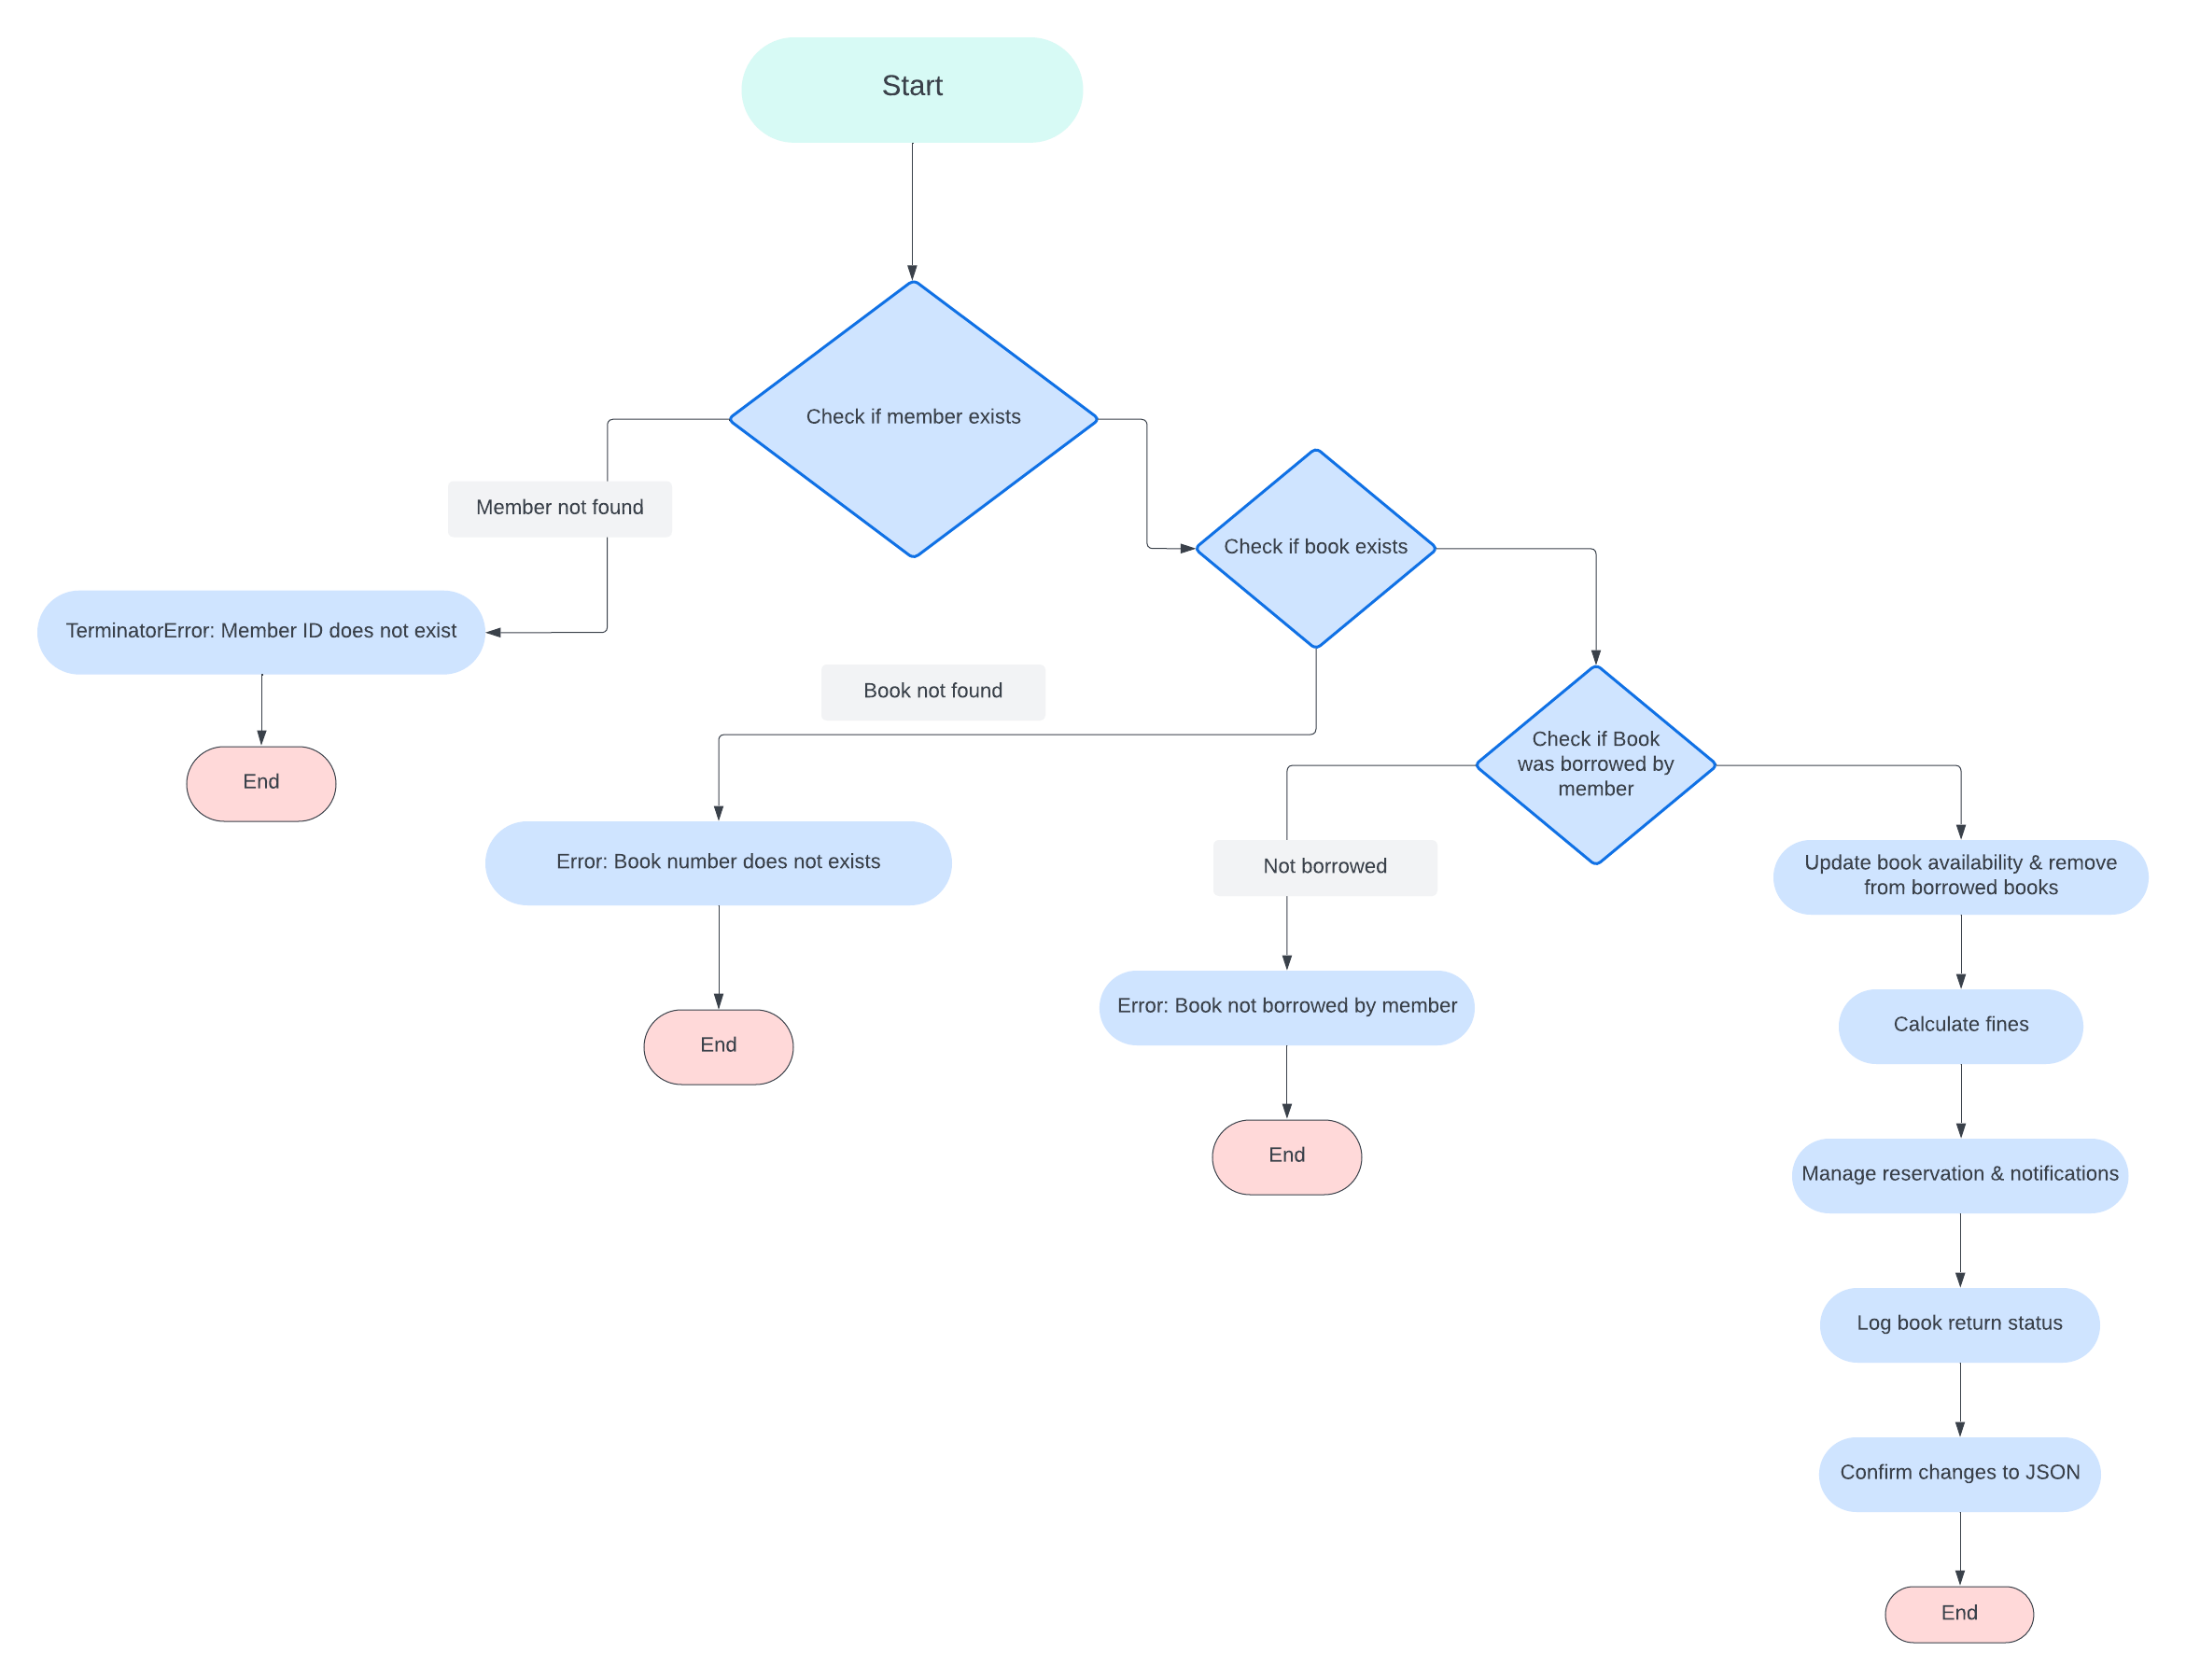

-----------

### **member_return_book(self, member_id: str, book_number: str, dummy_smtp_server: DummySMTPServer) -> float**
Handles the process of a library member returning a borrowed book. This method ensures that the book was actually borrowed by the member, updates its availability, calculates any fines due to late returns, manages any reservations, and sends necessary notifications.

#### Parameters:
- **member_id (str)**: the member ID, returning the book.
- **book_number (str)**: The number of the book being returned.
- **dummy_smtp_server (DummySMTPServer)**: A dummy SMTP server instance used for sending notifications without actual network activity.

#### Returns:
- **float**: The amount of total fines the member accrued, if any, or zero if no fines are due. 

#### Process:
1. **Member and Book Validation**:
   It confirms that:
   - the member exists in the library's records.
   - the book exists within the library's catalog.
   - The book was actually borrowed by the member.
    If any of the checks fail, it returns a fine of zero and logs an appropriate error message.

3. **Book Return Processing**:
   - Changes the status of the book as 'available'.
   - Removes the book from the member's list of borrowed books.

4. **Fine Calculation**:
   - Calculates any fines due based on the late return of the book using the member's **calculate_fines** method. (It calculates the total fine, not limited this return)

5. **Reservation Management**:
   - Manages the reservation queue for the returned book. If the book is reserved, it notifies the next member in line that the book is now available using the provided dummy SMTP server.

6. **Remar**:
   - Logs the return event, including the member's name, the book title, and any fines charged.
   - Updates the library's JSON files to reflect the changes made during the return process.

#### Process Flow:
- When a member attempts to reserve a book, the system first checks if the book is available.
- If available, the book is borrowed directly, bypassing the reservation system.
- If unavailable, the member is added to the book's reservation queue.
- Periodically, the system checks books with reservations to see if they have become available:
- If a book is available, the system notifies the next member in the queue using the dummy SMTP server.
- The notified member can then proceed to borrow the book. (The procedure triggers to be completed automatically simultaneously)



---------

ble": true
    }
  ]


### **update_json_files(self) -> None**
Updates the JSON files to reflect the current state of the library's data, ensuring all changes to books, members, and loans are accurately recorded.

#### Behavior:
- **Change Detection**: Before attempting any updates, the method first checks if there have been changes to the books' availability, any new members added, or any new loans issued since the last update.
- **Conditional Updates**:
  - **Books**: Updates the **books.json**file if any books have been borrowed or returned, marking changes in their availability.
  - **Members**: Updates the **members.json** file if any new members have been added to the library's system.
  - **Loans**: Updates the **loans.json** file if any new loans have been registered.
- **Efficiency**: Only updates the JSON files if changes are detected, minimizing unnecessary file operations.

#### JSON File Structure:
- **Books JSON**:
  
  [
  
    {
  
      "book_number": "book1",
  
      "title": "Example Book Title",
  
      "author": "Author Name",
  
      "genre": "Book Genre",
  
      "publisher": "Publisher Name",
  
      "available": true
  
    }
  
  ]


_and_notifications('123', dummy_smtp)


--------
### **manage_reservations_and_notifications(self, book_number, dummy_smtp_server)**

This method oversees the management of the reservation queue for a book being returned to the library and ensures timely notifications are sent to members awaiting the availability of that book.

#### Parameters:
- **book_number (str)**: The identifier for the book that is being returned and which might have pending reservations.
- **dummy_smtp_server (DummySMTPServer)**: A simulated SMTP server used for sending out notification emails in a test environment without actual email dispatch.

#### Process:
1. **Check Reservations**:
   - The method first checks if the returned book has any pending reservations by looking up its book number in the `reserved_books` dictionary.
   - If there are reservations, the method retrieves the ID of the next member in line (i.e., the first member in the reservation queue).

2. **Send Notifications**:
   - If a member is waiting for the book, a notification email is constructed and sent through the provided dummy SMTP server. This email informs the member that the book is now available for pickup or borrowing.
   - The notification details include the member's email address and a custom message about the availability of the book.

3. **Manage Reservation Queue**:
   - After sending the notification, the method updates the reservation queue by removing the notified member's ID.
   - If there are no more members in the queue, a message is printed to the console indicating that there are no further reservations for the book.

4. **Update Library Catalog**:
   - Regardless of the reservation status, the returned book is added back to the library's shelf, making it available for borrowing again.

5. **Persistence**:
   - Updates are made to the library's JSON files to reflect the changes in the book's availability and the reservation queue.

#### Side Effects:
- **Console Output**:
  - The method outputs various messages to the console to provide real-time feedback on the actions being taken, such as successful notification delivery and the status of the reservation queue.

### Remarks:
- This method ensures the library maintains a fair and efficient system for book reservations, enhancing user satisfaction by promptly notifying members about book availability.
- It relies heavily on the accurate functioning of the **find_member_details** method to fetch the necessary member details for notifications.




-----

ed to reserve or borrow the book.")


### **reserve_book(self, member_id, book_number)**

This method manages the process of reserving a book in the library, ensuring proper handling of book availability and member eligibility.

#### Parameters:
- **member_id (str)**: The ID of the member attempting to reserve the book.
- **book_number (str)**: The identifier for the book being reserved.

#### Process:
1. **Validation Checks**:
   - The method first verifies the existence of both the book and the member using their respective IDs. If either is not found in the library's records, it returns **False** and prints an error message indicating the missing book or member.

2. **Direct Borrowing**:
   - If the book is available and not currently reserved by any member, it allows the member to borrow the book directly. This is reflected by setting the book's availability to **False** and adding the book to the member's list of borrowed books. A message is printed to confirm the borrowing, and the library's JSON files are updated to reflect this change.

3. **Handle Existing Reservations**:
   - If the book is already reserved, the method checks if the current member is attempting to reserve it again. If so, it returns **False** and informs the user that the book has already been reserved by them.

4. **Queue Management**:
   - If the book is unavailable due to existing reservations, the member's ID is added to the reservation queue unless they are already in the queue. The queue ensures that members are notified in the order they requested the book once it becomes available again.

5. **Confirmation**:
   - After successfully adding the member to the reservation queue, the method prints a confirmation message stating that the book has been reserved by the member.

#### Returns:
- **bool**: Returns **True** if the book is successfully reserved or borrowed directly by the member; otherwise, returns **False**.

#### Remarks:
- This method is critical for managing book circulation within the library, ensuring fair access to resources and maintaining order in the reservation process. It directly interacts with the library's JSON files to keep the system's state consistent with real-world changes.



-----

### **Future Development and Enhancements:**

The current library system is a queue-based reservation system, which operates on a first-come first-served basis. This method is straightforward and fair but can be enhanced or supplemented with additional features and strategies to improve user experience and efficiency. There are other methods available, currently didnt explore those avenues.

Some possible methods features potentially could be considered for future development:

* API Integration: Methods could be added to integrate with external library databases for real-time data synchronization.
* Digital Media Management: Expand the library system to include e-books and digital media with corresponding borrowing mechanisms.
* Member Portal Integration: Develop an online portal where members can view their loan history, fines, and manage reservations.
This class serves as the backbone of a library management system, centralizing the management of library resources, member activities and tasks, thereby facilitating efficient library operations. This can be offered through Apps too.
  
* Priority-Based Reservations based on specific criteria such as membership level (e.g., premium members get higher priority, academic priorities for students or researchers for academic materials), or by the frequency of library usage.

* Implement dynamic reservation windows where a limited reservation time before picking up a book based on demand or historical data about how quickly books in certain categories are picked up.
   
* Reservation Limits for members where a member can have at one time for popular resources. It can be again controlled by different levels of membership tires.
   
* Use data analytics to predict high-demand periods or titles to adjust reservation allowances, number of materials by increasing stocks or rotating among different libraries to a more robust dynamic rotation to save time.
   
* Group or Batch Reservations for educational establishments or special academic groups or for special events.
   
* Reservation Extensions and Modifications.
   
* Automated Reservation Suggestions with the help of predcitive algorithms such as Netflix.

#### Printing in tabular format

- I have used lists to store book and member information before joining them into a string instead of using a 'string' to append information. This is to optimize performance as a used case scenario. It is useful when dealing with big datasets.
- Using tabulate.tabulate() function to organise the print the result in plain test format. By using 'tablefmt' parameter we can specify and adjust the spacing between fields in the tabular format. One of the format is 'plain' which allows to specify the spacing between columns using the 'colalign' parameter. 'colalign=('left') parameter provides the alignment all columns to the left.
  

### **Book reservation:**
I used a queue system to reserve books. The first notification is sent to the first member who reserved the same book. First come first serve basis.

When a member returns a book, I check if there are any reservations for the book. If there are I notify the first member in the reservation queue. This system is flexible because it allows for multiple members to be in the reservation queue, and it notifies them in the order they reserved the book.



For the second notification, when a returned book is late and a fine is incurred, you can implement a similar system. After a member returns a book, you can check if it was returned late (i.e., if the return date is more than 14 days after the loan date). If it is late, you can calculate the fine and notify the member of the late return and the amount of the fine.

To improve the extensibility of your notification system, you can consider decoupling the notification logic from the main library class. Instead of hardcoding the notification behavior directly into the library methods, you can create a separate notification service or class that handles all notifications. This way, if you need to add more notification types or change the notification behavior in the future, you can do so without modifying the library class itself. Additionally, using a separate notification service allows you to easily switch between different notification methods (e.g., email, SMS, push notification) or integrate with external notification services.

Overall, by separating concerns and making your notification system modular and extensible, you can ensure that it remains flexible and adaptable to future changes in requirements.

Barcode Duplication: If the barcode is unique and there is no chance of duplication across different books or items in your system, using the barcode as the book number can simplify the process, as you won't need to generate and manage additional identifiers.

System Integration: If your library system interacts with other systems that use barcodes as identifiers, using the same barcode for the book number can facilitate integration and data exchange.

Scalability: If your library collection is expected to grow significantly over time, you may want to consider using a separate book number that can accommodate larger numbers of books without running into barcode length limitations or other issues.

Flexibility: Using a separate book number allows for more flexibility in the system design. For example, you can easily change the barcode format or switch to a different barcode symbology in the future without affecting the book numbering scheme.

Barcode Standards: Consider any standards or conventions related to barcodes in your domain or industry. If there are specific standards that dictate how barcodes should be used, it's important to adhere to them to ensure compatibility and interoperability.

--------
### **Standalone functions:**
------

-----
#### **csv_to_json_without_header_row(csv_filename, json_filename, column_names)**:

the function has three arguments:
- csv_filename: The filename of the CSV file to be read.
- json_filename: The filename of the JSON file to be created.
- column_names: A list of column names to use in the resulting JSON file
  
It opens up the CSV file reading with "r" mode and the encoding='utf-8-sig' argument ensures that the file is opened with the UTF-8 encoding and handles the potential byte order mark (BOM) at the beginning of the file.

The 'column_names'is a list of column names that is expected to find in the CSV file is provided when calling the function.
When processing rows, for each row in the CSV file, the function creates a dict 'row_data' by zipping together the 'column_names' with row values. In this way the function correctly map the values in each row to the corresponding column name.

In [5]:
def csv_to_json_without_header_row(csv_filename, json_filename, column_names):
    """
    Convert a CSV file to a JSON file without a header row.

    Args:
        csv_filename (str): The filename of the CSV file.
        json_filename (str): The filename of the JSON file to be created.
        column_names (list): A list of column names in the CSV file.
    """
    with open(csv_filename, 'r', newline='',  encoding='utf-8-sig') as csv_file:
        csv_reader = csv.reader(csv_file)
        data = []
        for row in csv_reader:
            # Create a dictionary by zipping column names with row values
            row_data = {column: value for column, value in zip(column_names, row)}
            data.append(row_data)

    # Write the data to the JSON file
    with open(json_filename, 'w') as json_file:
        json.dump(data, json_file, indent=4)



----------
#### **csv_to_json_with_header_row(csv_filename, json_filename):**
Similar functionality when iterate the rows as in csv_to_json_without_header_row(csv_filename, json_filename), but here it assigns the first row as the column heads and then iterate and map the values to the column head.

In [6]:

def csv_to_json_with_header_row(csv_filename, json_filename):
    """
    Convert a CSV file to a JSON file with a header row.

    Args:
        csv_filename (str): The filename of the CSV file.
        json_filename (str): The filename of the JSON file to be created.
    """
    with open(csv_filename, 'r', newline='', encoding='utf-8-sig') as csv_file:
        csv_reader = csv.reader(csv_file)
        
        # Read the header row to get the column names
        column_names = next(csv_reader)
        
        data = []
        
        # Read the remaining rows and map them to dictionaries
        for row in csv_reader:
            row_data = {column: value for column, value in zip(column_names, row)}
            data.append(row_data)

    # Write the data to the JSON file
    with open(json_filename, 'w') as json_file:
        json.dump(data, json_file, indent=4)



---------
#### Load loans dataset from the CSV file:
bookloans_2024.csv has no headers. With ref to the previous assessment the headers are book_nummber, member_number, data_of_loan and date_of_return. While reading from the CSV file we imply the following keys to the dictionary values.

- book_number: This corresponds to the value in the first column of each row (row[0]).
- member_number: This corresponds to the value in the second column of each row (row[1]).
- date_of_loan: This corresponds to the value in the third column of each row (row[2]). The value is converted from -Excel epoch format to a standard date format using the excel_to_date() function.
- date_of_return: This corresponds to the value in the fourth column of each row (row[3]). If the value is empty, it is represented as None. Indeed this dataset is cleaned one and has no empty values. Otherwise, it is converted from Excel epoch format to a standard date format using the excel_to_date function.
- It opens the CSV file name with the name csv_filename (stored in the same folder, otherwise to provide the full path). It reads in reaad mode with 'UTF-8' encoding.
- It initializes an empty list 'loans' to store loan record while iterating each record using CSV reader.
- For each row, it checks if the row has at least four elements (to ensure it contains the necessary loan data).
- If the row has enough elements, it creates a distionary representing the book_loans with keysbook_nummber, member_number, data_of_loan and date_of_return.
- The 'date_of_loan' and 'date_of_return' values are converted from Excel epoch format to standard date format using the excel_to_date function.
- It appends loan data to the 'loans[]' list.
- It handles errors of not enough elements, not found file and other exceptions during the execution and returns the appropriate messages.
- The function returns the list of loan dictionaryon.

--------
#### Load members from the JSON file and assign to **'members'** dictionary

In [7]:
def load_members_from_json(json_filename):
    try:
        with open(json_filename, 'r') as jsonfile:
            data = json.load(jsonfile)
            print("members data loaded from JSON file:")
            print("===============================================================================================================") 
            print(data)
            members = {}
            for item in data:
                member_id = item.get('ID', '')  # Handle missing 'ID' key
                first_name = item.get('First Name', '')
                last_name = item.get('Last Name', '')
                email = item.get('Email', '')
                fines = item.get('Fines', 0)
                membership_card = item.get('Card Number', '')  # Handle missing 'Card Number' key
                # Ensure correct order of arguments when creating Member object
                member = Member(member_id, first_name, last_name, email, fines, membership_card)
                members[member_id] = member
        return members
    except FileNotFoundError:
        print(f"Error: File '{json_filename}' not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON syntax in file '{json_filename}'.")
        return {}


--------
#### Load books from the JSON file and assign to **'books'** dictionary

In [8]:


def load_books_from_json(json_filename):
    """
    Load 'books' data from the JSON file and return as a dictionary.

    Args:
        json_filename (str): The name of the JSON file containing 'books' data.

    Returns:
        dict: A dictionary of Book objects keyed by their book_numbers.
    """
    try:
        with open(json_filename, 'r', encoding='utf-8-sig') as jsonfile:  # specify the encoding
            data = json.load(jsonfile)
            print("books data loaded from JSON file:")
            print("===============================================================================================================") 
            print(data)  # Add this line to print the loaded data structure
            books = {}
            for item in data:
                book_number = item['Number']
                title = item['Title']
                author = item['Author']
                genre = item['Genre']
                publisher = item['Publisher']
                book = Book(book_number, title, author, genre, publisher)
                books[book_number] = book
        return books
    except FileNotFoundError:
        print(f"Error: File '{json_filename}' not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON syntax in file '{json_filename}'.")
        return {}



---------
#### Load the loan details with hardcoded infusion of dates in normal date format, already converted from Excel EPOCH format. This practice helped me to avoid various inconsistencies while running the code, especially while calculating members' total fines successfully.

#### The function returns **'loans'** dictionary

In [9]:

import json
import datetime

def excel_to_date(excel_date):
    """
    Converts an Excel date integer to a Python datetime object.
    """
    if not excel_date:  # Handling cases where excel_date might be None or empty
        return None
    excel_epoch_start = datetime.datetime(1899, 12, 30)
    return excel_epoch_start + datetime.timedelta(days=int(excel_date))

def load_loans_from_json(json_filename):
    """
    Load 'loans' data from a JSON file and return as a list of dictionaries.
    Each loan record will have dates converted from Excel epoch format to YYYY-MM-DD format.

    Args:
        json_filename (str): The name of the JSON file containing 'loans' data.

    Returns:
        list: A list of dictionaries representing loan records.
    """
    loans = []
    try:
        with open(json_filename, 'r', encoding='utf-8-sig') as jsonfile:
            data = json.load(jsonfile)
            print("loans data loaded from JSON file:")
            print("===============================================================================================================")
            for item in data:
                # Check if all required fields are present
                if all(field in item for field in ['book_number', 'member_number', 'date_of_loan', 'date_of_return']):
                    loan_date = excel_to_date(item['date_of_loan'])
                    return_date = excel_to_date(item['date_of_return']) if item['date_of_return'] else None
                    loan = {
                        'book_number': item['book_number'],
                        'member_number': item['member_number'],
                        'date_of_loan': loan_date.strftime('%Y-%m-%d') if loan_date else 'Unknown',
                        'date_of_return': return_date.strftime('%Y-%m-%d') if return_date else 'Not returned yet'
                    }
                    loans.append(loan)
                    print(f"Member Number: {loan['member_number']}, Book Number: {loan['book_number']}, Date of Loan: {loan['date_of_loan']}, Date of Return: {loan['date_of_return']}")
                else:
                    print("Error: Missing required fields in loan record.")
    except FileNotFoundError:
        print(f"Error: File '{json_filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return loans



-------
**member_borrow_book()** is a class method. Initially, I had borrow_book() function to handle member borrowing books, due to code functioning behavioral inconsistencies and software architecture inconsistencies I decided to move it into a class method. This is another example of how to change or further develop the code structure without interfering with the code's functioning capabilities.

Currently, borrow_book() functions as an intermediate function and improves the readability of the code.

In [10]:
def borrow_book(self, member_id, book_number):
    """
    Allows a member to borrow a book from the library using the existing member_borrow_book method.

    Args:
        member_id (str): The ID of the member borrowing the book.
        book_number (str): The book number of the book being borrowed.

    Returns:
        bool: True if the book was successfully borrowed, False otherwise.
    """
    return self.member_borrow_book(member_id, book_number)


---------

-------------
## **Execution of the main program**
-----------


## **Task 1** (copied from the given paper)
- 1.1 Convert the CSV files to JSON files – this is assessed.
- 1.2 Provide a **scan()** method for the Book and for the Member classes.
- 1.3 Provide code that will allow a member to **borrow a book** updating the JSON file.
- 1.4 Use dummy data to test the code and state the preconditions and postconditions of the operation in
a **docstring**.

*You may issue a notification that a book is borrowed but it is not assessed in this task the focus being on updating the JSON file.*


### **1.1 Reading and loading data files to JSON format from CSV**

Read CSV files stored in the same directory (or give the whole path).

In [11]:
# Create library instance
library = Library("My Library")

In [12]:
# Convert CSV files to JSON

# reading 'book_2024.csv' file with header row, assuming the file is stored in the same folder or specify the full path:
csv_to_json_with_header_row('books_2024.csv', 'books.json')

# reading 'members_2024.csv' file with headers row, assuming the file is stored in the same folder or specify the full path:
csv_to_json_with_header_row('members_2024.csv', 'members.json')

# reading 'bookloans_2024.csv' file without headers row, assuming the file is stored in the same folder or specify the full path:
column_names =  ['book_number', 'member_number', 'date_of_loan', 'date_of_return']
csv_to_json_without_header_row('bookloans_2024.csv', 'loans.json', column_names)


# Load data from JSON files
books = load_books_from_json("books.json")
#members = load_members_from_json("members.json")
#bookloans = load_loans_from_json("loans.json")
  


books data loaded from JSON file:
[{'Number': '1', 'Title': 'Fundamentals Of Wavelets', 'Author': 'Jaideva Goswami', 'Genre': 'Tech', 'SubGenre': 'Signal Processing', 'Publisher': 'Wiley'}, {'Number': '2', 'Title': 'Data Smart', 'Author': 'John Foreman', 'Genre': 'Tech', 'SubGenre': 'Data Science', 'Publisher': 'Wiley'}, {'Number': '3', 'Title': 'God Created The Integers', 'Author': 'Stephen Hawking', 'Genre': 'Tech', 'SubGenre': 'Mathematics', 'Publisher': 'Penguin'}, {'Number': '4', 'Title': 'Superfreakonomics', 'Author': 'Stephen Dubner', 'Genre': 'Science', 'SubGenre': 'Economics', 'Publisher': 'Harper Collins'}, {'Number': '5', 'Title': 'Orientalism', 'Author': 'Edward Said', 'Genre': 'Non-fiction', 'SubGenre': 'History', 'Publisher': 'Penguin'}, {'Number': '6', 'Title': 'The Nature Of Statistical Learning Theory', 'Author': 'Vladimir Vapnik', 'Genre': 'Tech', 'SubGenre': 'Data Science', 'Publisher': 'Springer'}, {'Number': '7', 'Title': 'Integration Of The Indian States', 'Author

In [13]:
members = load_members_from_json("members.json")

# members records

members data loaded from JSON file:
[{'ID': '1', 'First Name': 'Adelaide', 'Last Name': 'Cunningham', 'Gender': 'Female', 'Email': 'a.cunningham@randatmail.com', 'Card Number': '1-13'}, {'ID': '2', 'First Name': 'Charlie', 'Last Name': 'Roberts', 'Gender': 'Male', 'Email': 'c.roberts@randatmail.com', 'Card Number': '2-22'}, {'ID': '3', 'First Name': 'Eric', 'Last Name': 'Cooper', 'Gender': 'Male', 'Email': 'e.cooper@randatmail.com', 'Card Number': '3-33'}, {'ID': '4', 'First Name': 'Cadie', 'Last Name': 'Hall', 'Gender': 'Female', 'Email': 'c.hall@randatmail.com', 'Card Number': '4-43'}, {'ID': '5', 'First Name': 'Darcy', 'Last Name': 'Howard', 'Gender': 'Female', 'Email': 'd.howard@randatmail.com', 'Card Number': '5-52'}, {'ID': '6', 'First Name': 'Connie', 'Last Name': 'West', 'Gender': 'Female', 'Email': 'c.west@randatmail.com', 'Card Number': '6-61'}, {'ID': '7', 'First Name': 'Lyndon', 'Last Name': 'Ellis', 'Gender': 'Male', 'Email': 'l.ellis@randatmail.com', 'Card Number': '7-72'

In [14]:
bookloans = load_loans_from_json("loans.json")

# `library` is Library instance and `bookloans` contains the list of loan records.
library.assign_loans_to_members(bookloans)
# Add books and members to the library
# Due to inconsistencies in converting dates from EXCEL EPOCH to date format,
# I have hardcoded the conversion at this level before loading the 'bookloans' and assigned them to members to get the correct loan
# details in calculations for Fines and for the further usage of the dictionary.


loans data loaded from JSON file:
Member Number: 101, Book Number: 1, Date of Loan: 2024-01-06, Date of Return: 2024-01-25
Member Number: 78, Book Number: 1, Date of Loan: 2024-01-31, Date of Return: 2024-02-09
Member Number: 183, Book Number: 1, Date of Loan: 2024-02-17, Date of Return: 2024-03-03
Member Number: 26, Book Number: 1, Date of Loan: 2024-03-10, Date of Return: 2024-03-12
Member Number: 38, Book Number: 1, Date of Loan: 2024-03-19, Date of Return: 2024-03-24
Member Number: 23, Book Number: 1, Date of Loan: 2024-03-25, Date of Return: 2024-04-01
Member Number: 79, Book Number: 1, Date of Loan: 2024-04-06, Date of Return: 2024-04-09
Member Number: 33, Book Number: 1, Date of Loan: 2024-04-12, Date of Return: 2024-04-29
Member Number: 188, Book Number: 1, Date of Loan: 2024-04-30, Date of Return: 2024-05-08
Member Number: 48, Book Number: 1, Date of Loan: 2024-05-11, Date of Return: 2024-05-25
Member Number: 68, Book Number: 1, Date of Loan: 2024-05-31, Date of Return: 2024-0

In [15]:
import datetime  # This imports the module
from datetime import datetime  # This imports the class 'datetime' from the module 'datetime'

# Create an instance of the Library
library = Library("My Library")

# Add books to the library
for book in books.values():
    library.add_book_to_shelf(book)

# Add members to the library
for member in members.values():
    library.add_new_member(member)

# Assign loan records to members
library.assign_loans_to_members(bookloans)

# Optionally, after loading all data and connecting loans, calculate fines for each member
for member_id, member in library.members.items():
    fines = member.calculate_fines()
    #print(f"Member ID {member_id} has fines: £{fines:.2f}")

In [16]:

for book in books.values():
    library.add_book_to_shelf(book)

for member in members.values():
    library.add_new_member(member)

for member in members.values():
    library.add_new_member(member)



#### **Short members list:**
The following members list is to help with selecting appropriate membership numbers for follow-up tasks. It is not a requirment of the assessment but an essential step to carry out testing functions meaningfully. At different locations, further such lists are created to help with selecting required data.

--------
### **Members List**

In [17]:
# Define a function to display member information using tabulate

def display_members(members):
    member_list = []
    for member in members.values():
        member_list.append([f"{member.first_name} {member.last_name}", member.member_id, member.membership_card])
    print(tabulate(member_list, headers=['Name', 'Member Number', 'Membership Card Number']))

# 1. Print tabulate list of members with the card numbers
print("Members List:")
display_members(members)

Members List:
Name                   Member Number  Membership Card Number
-------------------  ---------------  ------------------------
Adelaide Cunningham                1  1-13
Charlie Roberts                    2  2-22
Eric Cooper                        3  3-33
Cadie Hall                         4  4-43
Darcy Howard                       5  5-52
Connie West                        6  6-61
Lyndon Ellis                       7  7-72
Amy Hamilton                       8  8-82
Kelvin Wilson                      9  9-93
Arianna Watson                    10  0
Lydia Farrell                     11  11-13
Ada Harris                        12  12-22
Sarah Wilson                      13  13-31
Nicole Phillips                   14  14-43
Maddie Anderson                   15  15-53
Brad Alexander                    16  16-61
Lucia Spencer                     17  17-72
Freddie Ellis                     18  18-83
Hailey Moore                      19  19-92
Kelsey Morrison                   20  2

-------
### **Books List**

In [18]:
#from tabulate import tabulate

# Define a function to display books information using tabulate
def display_books(books):
    book_list = []
    for book in books.values():
        # Adjusted to include only necessary information
        book_list.append([book.book_number, f"barcode-{book.book_number}", book.title, book.author])
    # Specify headers correctly to align with the list elements
    print(tabulate(book_list, headers=['Book Number', 'Book Barcode', 'Title', 'Author']))

# Assuming `books` is a dictionary loaded with book data as mentioned earlier
print("Book List:")
display_books(books)


Book List:
  Book Number  Book Barcode    Title                                                   Author
-------------  --------------  ------------------------------------------------------  ---------------------
            1  barcode-1       Fundamentals Of Wavelets                                Jaideva Goswami
            2  barcode-2       Data Smart                                              John Foreman
            3  barcode-3       God Created The Integers                                Stephen Hawking
            4  barcode-4       Superfreakonomics                                       Stephen Dubner
            5  barcode-5       Orientalism                                             Edward Said
            6  barcode-6       The Nature Of Statistical Learning Theory               Vladimir Vapnik
            7  barcode-7       Integration Of The Indian States                        V P Menon
            8  barcode-8       The Drunkard'S Walk                             

--------
### **1.2 Test the scan() method**

#### **to simulate the actual scan with dummy book numbers.**

Selected the barcodes in the format "barcode-xxx" where xxx is the book number to simulate the scanning process with the scan() method. Also I have simulated when the barcode is not scanning to enter the manual number. The manual number is hypothetically just the **book number**.

Scan() method will scan the barcode and retrieves the book details from the dataset wiith the actual book information and display them.

- I included the **scan()** method in the 'Book' class as the book is defined in the class Book. 
- scan() method returns the book number. 'get()' method will retrieve the value from the dictionary relevant to the key (book number).
- We use 'books' to check if the scanned book number exists in the dictionary.
- If the book is found, it will return the result of calling __ str __() from the corresponding 'Book' class or the object to get the book details.
- If the book is not found. it will return a message indicating the "Book not found".


***Note:*** Please feel free to change the barcodes/book numbers to check the funtionality!

In [19]:

# List of barcode or book numbers to test
barcode_or_book_numbers = ['1', 'barcode-2', 'barcode-91', '26', '20']

# Testing the scan() method with multiple barcode or book numbers
print("===============================================================================================================")
print("Testing the scan() method to scan a book")
print("---------------------------------------------------------------------------------------------------------------")
print("* To SCAN a book, using dummy barcode in format 'barcode-xxx' to simulate scan() method for self scanned barcode,")
print("* Or simulating book number in format 'xxx' if the scanner doesn't work, considered as manually entered barcode")
print("---------------------------------------------------------------------------------------------------------------")

for barcode_or_book_number in barcode_or_book_numbers:
    print("===============================================================================================================")    
    print(f"Scanning: {barcode_or_book_number}")
    print("---------------------------------------------------------------------------------------------------------------")

    # Simulate scan by calling the scan() method
    book_number = Book.scan(barcode_or_book_number, books)

    # Retrieve the book object using the book number
    book = books.get(book_number)
        
    # Check if the book object exists
    if book:
        # Print out the details of the book
        print("Book Number:", book.book_number)
        print("Title:", book.title)
        print("Author:", book.author)
        print("Genre:", book.genre)
        print("Publisher:", book.publisher)
    else:
        print("Book not found")



Testing the scan() method to scan a book
---------------------------------------------------------------------------------------------------------------
* To SCAN a book, using dummy barcode in format 'barcode-xxx' to simulate scan() method for self scanned barcode,
* Or simulating book number in format 'xxx' if the scanner doesn't work, considered as manually entered barcode
---------------------------------------------------------------------------------------------------------------
Scanning: 1
---------------------------------------------------------------------------------------------------------------
Book Number: 1
Title: Fundamentals Of Wavelets
Author: Jaideva Goswami
Genre: Tech
Publisher: Wiley
Scanning: barcode-2
---------------------------------------------------------------------------------------------------------------
Book Number: 2
Title: Data Smart
Author: John Foreman
Genre: Tech
Publisher: Wiley
Scanning: barcode-91
-------------------------------------------------

-----------
#### **Test the scan() method to simulate the actual scanning membership card with dummy numbers.**
Selected the barcodes in the format xxx-yyy" where 'xxx' is the memberk number and 'yyy' is the issue numberr to simulate the scanning process with the scan() method. Also I have simulated when the barcode is not scanning to enter the manual number. The manual number isjust the member number without any issue numbersr.

Scan() method will scan the barc/member numberode and retrieves tmemberook details from the datase wiith the actumember'sook information and display them.


- **scan()** method in the 'Member' class as a member is defined in the class Members. 
- scan() method returns the member number. 'get()' method will retrieve the value from the dictionary relevant to the key (member numbere).
- We use 'member_details' to check if the scanned member number exists in the dictionary.
- If the member is found, it will return the result from the corresponding 'Member' class or the object to get the member details.
- If the member_details is not found. it will return a message indicating the "Member not found".


In [20]:
# List of membership IDs or member numbers to test
membershipID_or_member_number = ['1', '52-21', '53-33', '95', '100', '250']

# Testing the scan() method with multiple membership IDs or member numbers
print("===============================================================================================================")
print("Testing the scan() method to scan membership card")
print("---------------------------------------------------------------------------------------------------------------")
print("* To SCAN a membership card, using dummy data in format 'xxx-yy' to simulate scan() method for self scanned membership ID,")
print("(where 'xxx' is member number and 'yy' is issue number)")
print("* Or simulating member number 'xxx' if the scanner doesn't work, considered as manually entered ID")
print("---------------------------------------------------------------------------------------------------------------")

for member_number in membershipID_or_member_number:
    print("===============================================================================================================")
    print(f"Scanning: {member_number}")
    print("---------------------------------------------------------------------------------------------------------------")

    # Simulate scan by calling the scan() method
    member_details = Member.scan(member_number, members)

    # Check if the member details exist
    if member_details:
        # Print out the details of the member
        print("Member Number:", member_details['member_number'])
        print("Name:", member_details['name'])
        print("Email:", member_details['email'])
        print("Membership Card:", member_details['membership_card'])
    else:
        print("Member not found")


Testing the scan() method to scan membership card
---------------------------------------------------------------------------------------------------------------
* To SCAN a membership card, using dummy data in format 'xxx-yy' to simulate scan() method for self scanned membership ID,
(where 'xxx' is member number and 'yy' is issue number)
* Or simulating member number 'xxx' if the scanner doesn't work, considered as manually entered ID
---------------------------------------------------------------------------------------------------------------
Scanning: 1
---------------------------------------------------------------------------------------------------------------
Member Number: 1
Name: Adelaide Cunningham
Email: a.cunningham@randatmail.com
Membership Card: 1-13
Scanning: 52-21
---------------------------------------------------------------------------------------------------------------
Member Number: 52
Name: Jasmine Tucker
Email: j.tucker@randatmail.com
Membership Card: 52-21
Sca

### **1.3 Simulating to allow a member to **borrow a book** updating JSON**
Instead of using dummy data, I have prompted a user to enter the member number and the book number.
There are three entries included for testing. This will give an opportunity to test, relevant returns, reservations and reservation notification.  

***Upgrade option:*** It is possible to upgrade the code to scan 'member numbers' and 'book numbers' to borrow by using scan() method

In [21]:
def borrow_books(library, borrow_member_ids, borrow_book_numbers):
    """
    Borrow books scenario.

    Args:
    - library: Library object.
    - borrow_member_ids (list): List of member IDs.
    - borrow_book_numbers (list): List of book numbers.
    """
    print("===============================================================================================================")
    for member_id, book_number in zip(borrow_member_ids, borrow_book_numbers):
        member = library.find_member_details(member_id)
        if member:
            member_name = f"{member.first_name} {member.last_name}"
        else:
            member_name = "Unknown"
        borrowed_books = borrow_book(library, member_id, book_number)
        print(f"Books borrowed by member {member_id} ({member_name}): {borrowed_books}")
        print("---------------------------------------------------------------------------------------------------------------")
    print("===============================================================================================================")

    
def borrow_books_with_dummy_data(library, borrow_member_ids, borrow_book_numbers):
    """
    Testing the functionality of borrow_books() with dummy data.
    - Data should be within the libary object.
    - books numbers (1-140) and members numbers (1-200) to test member borrowing a book with their ID
      are stored in two lists 'borrow_member_ids' and 'borrow_book_numbers'.
    - User may modify input data to test the functionality.

    Preconditions:
    - A Library object ('library') is available.
    - Dummy data is available for testing.
    - The Library object is properly initialized.

    Postconditions:
    - The operations are executed using selected or dummy data.
    - Results are validated against the expected outcomes.
    - The Library object is updated with the test data.
    """

    borrow_books(library, borrow_member_ids, borrow_book_numbers)

    # Library update JSON files
    library.update_json_files()
    print("===============================================================================================================")

# Change the input data to check different scenarios:
# borrowed books will be saved to JSON files and carried forward until the next rest:

borrow_books_with_dummy_data(library, ["10", "15", "20"], ["7", "8", "9"] )

Books JSON file updated.
Members JSON file updated.
Book: 'Integration Of The Indian States', book number: 7 by V P Menon, published by Orient Blackswan   has been borrowed by Arianna Watson.
Books borrowed by member 10 (Arianna Watson): True
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
Book: 'The Drunkard'S Walk', book number: 8 by Leonard Mlodinow, published by Penguin   has been borrowed by Maddie Anderson.
Books borrowed by member 15 (Maddie Anderson): True
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
Book: 'Image Processing & Mathematical Morphology', book number: 9 by Frank Shih, published by CRC   has been borrowed by Kelsey Morrison.
Books borrowed by member 20 (Kelsey Morrison): True
------------------------------------------------------------

_____________

## **Task 2:** 
(copied from the given task) 

- 2.1 Provide code that will allow a member to return a book updating the JSON file.
  Use dummy data to test the code and state the precondions and postcondions of the operation in a docstring.

- The focus here is the return of the book updated in the JSON file. A notfication that a book is
returned is not required for this task, but a returned book may have been reserved and, if so, a
notification that a reserved book has become available is required for Task 5.

### **2.1 Member returns a Book:**
Member borrows a book and then returns it. (to return a book member must borrow first, hence, selecting appropriate member numbers and book numbers in conjunction with borrow_books and return_books.  By modifying the dummy data lists, the functionality of the return_books() could be tested. i.e. if the book was not borrowed it will return an error message or if the return function runs twice again it will return an error as the books were already returned in the first instance.


#### **Over Due Fines List**
For references and the later on for **Task 5** the list is created

In [22]:
from datetime import datetime


def list_overdue_fines(library):
    overdue_members = []
    print("List of Members with Overdue Fines:")

    for member_id, member in library.members.items():
        total_fine = 0
        for loan in member.loans.values():
            try:
                loan_date = datetime.strptime(loan['date_of_loan'], '%Y-%m-%d')
                return_date = datetime.strptime(loan['date_of_return'], '%Y-%m-%d') if 'date_of_return' in loan else datetime.datetime.now()
                late_days = max((return_date - loan_date).days - 14, 0)
                fine = late_days * 5
                total_fine += fine
            except ValueError:
                print(f"Error parsing dates for Member ID {member_id}")

        if total_fine > 0:
            overdue_members.append((member_id, f"{member.first_name} {member.last_name}", f"£{total_fine:.2f}"))

    if not overdue_members:
        print("No members currently have outstanding fines.")
    else:
        print("-----------------------------------")
        print("{:<10} {:30} {:15}".format("Member ID", "Name", "Fines"))
        for member in overdue_members:
            print("{:<10} {:30} {:15}".format(*member))


In [23]:
print(list_overdue_fines(library))

List of Members with Overdue Fines:
-----------------------------------
Member ID  Name                           Fines          
1          Adelaide Cunningham            £55.00         
2          Charlie Roberts                £85.00         
3          Eric Cooper                    £45.00         
5          Darcy Howard                   £75.00         
6          Connie West                    £65.00         
7          Lyndon Ellis                   £55.00         
8          Amy Hamilton                   £50.00         
9          Kelvin Wilson                  £115.00        
10         Arianna Watson                 £45.00         
11         Lydia Farrell                  £30.00         
12         Ada Harris                     £110.00        
13         Sarah Wilson                   £110.00        
14         Nicole Phillips                £35.00         
15         Maddie Anderson                £55.00         
16         Brad Alexander                 £75.00         


-----
When a member returns a book, it checks for the total outstanding fines and prints with the other data

In [24]:
import datetime  # This imports the module
from datetime import datetime  # This imports the class 'datetime' from the module 'datetime'

def return_books(library, return_loan_member_ids, return_loan_book_numbers, dummy_smtp_server):
    """
    Return books and calculate fines scenario.

    Args:
    - library: Library object.
    - return_loan_member_ids (list): List of member IDs.
    - return_loan_book_numbers (list): List of book numbers.
    - dummy_smtp_server: DummySMTPServer object.
    """
    print("===============================================================================================================")
    for member_id, book_number in zip(return_loan_member_ids, return_loan_book_numbers):
        fines = library.member_return_book(member_id, book_number, dummy_smtp_server)
        if fines > 0:
            print(f"Fines for member {member_id}: £{fines:.2f}")

        print("---------------------------------------------------------------------------------------------------------------")
    print("===============================================================================================================")
    # check if the members outstanding fines > 0 


# Library update JSON files
library.update_json_files()

def return_books_with_dummy_data(library, return_loan_member_ids, return_loan_book_numbers):
    """
    Testing the functionality of return_books() with dummy data.
    - Data should be within the library object.
    - A book can be returned only if the book was borrowed.
    - To simulate scenarios using the function "test_borrow_books_with_dummy_data()" and modify dummy data.
    - books numbers (1-140) and members numbers (1-200) to test members returning a book with their ID
      are stored in two lists 'return_loan_member_id' and 'return_loan_book_numbers'.
   

    Preconditions:
    - A Library object (`library`) is available.
    - Dummy data is available for testing.
    - The Library object is properly initialized.

    Postconditions:
    - The operations are executed using selected or dummy data.
    - Results are validated against the expected outcomes.
    - The Library object is updated with the test data.
    """
    # Create an instance of DummySMTPServer
    dummy_smtp_server = DummySMTPServer()
    
    # Library update JSON files
    library.update_json_files()
    
    return_books(library, return_loan_member_ids, return_loan_book_numbers, dummy_smtp_server)


return_books_with_dummy_data(library, ["10", "15", "20", "20", "86"], ["7", "8", "9", "9", "5"])



Books JSON file updated.
Members JSON file updated.
Books JSON file updated.
Members JSON file updated.
No reservations found for this book.
Books JSON file updated.
Members JSON file updated.
Book 'Integration Of The Indian States', book number '7' has been returned by Arianna Watson. Total fines: £45.00
Books JSON file updated.
Members JSON file updated.
Fines for member 10: £45.00
---------------------------------------------------------------------------------------------------------------
No reservations found for this book.
Books JSON file updated.
Members JSON file updated.
Book 'The Drunkard'S Walk', book number '8' has been returned by Maddie Anderson. Total fines: £55.00
Books JSON file updated.
Members JSON file updated.
Fines for member 15: £55.00
---------------------------------------------------------------------------------------------------------------
No reservations found for this book.
Members JSON file updated.
Book 'Image Processing & Mathematical Morphology', boo

-----------
## **Task 3**

### **<u>3.1 The membership application and card issuance system.</u>**

A system that allows members of the public to apply for membership, become members, and receive membership cards with unique membership card numbers. The system will ensure that membership card numbers follow a specific format and avoid duplication while accommodating card re-issuance.



***(Cpoied Assessment 2 Task description)***

##### **<u>3.a Membership Card Number Format:</u>**

Membership Card Number Format: The membership card number will be a combination of the member's ID and a count of how many cards have been issued to that member, separated by a delimiter (e.g., a hyphen, underscore, etc.). Should a member with ID 100 be issued three cards, their membershipcard numbers will be 100-1, 100-2, and 100-3.

##### **<u>3.b Card Issuance and Reissuance:</u>**

 - If a member's card lapses or is lost, they can be reissued a new card with an updated count.
 - The count of issued cards will be reset to 1 when it reaches 99 for a specific member.

##### **<u>3.c, 3.d, 3.e Membership ID Management</u>**

- Membership IDs will never be reissued to avoid duplication of membership card numbers.
- New members will be assigned unique IDs, and the system will ensure that no ID is reused for a new member.
------------

Because the system is based on auto incremental mechanism, Membership IDs will never be reissued with a duplication membership card numbers. The *'member_number'* is unique, which is a sequenced number field in our dataset. When reissuing, it always be unique to the same member as the prefix is the unique member number and the suffix is the issue number. The suffix is auto-incremental and not hard-coded to have a risk of making duplicates. Also a condition is checked if the same details try to regeister twice.
 
 ***Note:*** we are not looking into removing members from the library as a requirement of this assessment. If we remove a member, there are scenarios to be considered: If we have to maintain the integrity and simplicity of the data structure it is not recommended to remove altogether the member ID instead a suggestion is to leave the member as 'inactive' status or delete and replace it with 'deleted_member' default data pre-defined. This is to maintain the integrity, unique number scheme, and easy auto incrementation of assigning numbers to new members. With GDPR laws, stakeholders' preferences, or member preferences, it could be decided if to retain the member details for a limited time, remove them from the database, or keep them forever. We are not looking into this in detail as it is not a requirement of this assessment. This could be a future development idea.

*<u>User case scenarios:*

- There are some member's card is given as '0'. I assume this case is that a card had never been issued to the member. so the member will be issued with a new card. The member will fall into a card re-issuance category.
- As it is not a requirement of the assessment I am not reissuing a new card to every single card member in the dataset where the membership card is '0'.
- It can be done through an iteration of the data field and creating a list of all the members whose membership is '0'—then calling the *'function reissue_membership_card_to_members(reissue_member_ids)'* to reissue a new card. I am not carrying out that exercise but it is shown as an example case scenario with members to show the functionality of the project.

-----------

In [25]:
def reissue_membership_card_to_members(reissue_member_ids):
    """
    Reissues membership cards to a list of members identified by their member IDs. This function checks each member ID,
    retrieves the member from a members dictionary, and either updates the membership card if it's a placeholder ("0"),
    or increments the card issue number for existing cards. Updates are saved by calling an external method to update JSON files.

    Parameters:
    reissue_member_ids (list of str): A list of member IDs for which the membership cards need to be reissued.

    Side effects:
    - Prints the status of each reissuance, including old and new membership card details.
    - Calls an external function `library.update_json_files()` to save changes to a JSON file.
    - Prints messages to indicate invalid member numbers if a member ID is not found in the `members` dictionary.

    Returns:
    None
    """
    
    print("===============================================================================================================")
    
    # Reissue membership cards for the members specified in the list
    for member_id in reissue_member_ids:
        if member_id in members:
            member = members[member_id]
            print(f"Old membership card issued for {member.first_name} {member.last_name}: {member.membership_card}")
            if member.membership_card == "0":
                new_card_number = f"{member_id}-1"
                member.membership_card = new_card_number  # Update membership card number in the Member object
            else:
                new_card_number = member.reissue_membership_card()
            
            print(f"New membership card issued for {member.first_name} {member.last_name}: {new_card_number}")
            # Update JSON file after reissuing membership card
            library.update_json_files()
            print("---------------------------------------------------------------------------------------------------------------")
        else:
            print("Invalid member number.")
    
    print("===============================================================================================================")


# Define dummy data for reissuing membership cards
reissue_member_ids = ["1", "2", "3", "4", "10"]

# Function call to reissue membership cards
reissue_membership_card_to_members(reissue_member_ids)


Old membership card issued for Adelaide Cunningham: 1-13
New membership card issued for Adelaide Cunningham: 1-14
Members JSON file updated.
---------------------------------------------------------------------------------------------------------------
Old membership card issued for Charlie Roberts: 2-22
New membership card issued for Charlie Roberts: 2-23
Members JSON file updated.
---------------------------------------------------------------------------------------------------------------
Old membership card issued for Eric Cooper: 3-33
New membership card issued for Eric Cooper: 3-34
Members JSON file updated.
---------------------------------------------------------------------------------------------------------------
Old membership card issued for Cadie Hall: 4-43
New membership card issued for Cadie Hall: 4-44
Members JSON file updated.
---------------------------------------------------------------------------------------------------------------
Old membership card issued for

----------
### **<u>Card Number Reset after the 99th.</u>**

When the count of issued cards reaches 99 for a specific member, the count will reset to 1, and the next card issued will have a count of 2 (assessment)

* Number of instances will be repeated to check until the issue number reach to 99.
* I have used the members' card numbers which are nearest to 99th, i.e. '9' and '19' and repeated a re-issuance new membership issue numbers until 99th and over to display the functionality of resetting the issuance number 1 after.

In [26]:
# Define dummy data for reissuing membership cards
reissue_member_ids = ["9", "9", "9", "9", "9", "9", "9", "9", "19", "19", "19", "19", "19", "19", "19", "19", "19" ]
# member ID '10' has '0' membership card, the member will be reissued with a new card with issue '1'
reissue_membership_card_to_members(reissue_member_ids)

# pre condition and postcondition with the membership numbers are printed on the display

Old membership card issued for Kelvin Wilson: 9-93
New membership card issued for Kelvin Wilson: 9-94
Members JSON file updated.
---------------------------------------------------------------------------------------------------------------
Old membership card issued for Kelvin Wilson: 9-94
New membership card issued for Kelvin Wilson: 9-95
Members JSON file updated.
---------------------------------------------------------------------------------------------------------------
Old membership card issued for Kelvin Wilson: 9-95
New membership card issued for Kelvin Wilson: 9-96
Members JSON file updated.
---------------------------------------------------------------------------------------------------------------
Old membership card issued for Kelvin Wilson: 9-96
New membership card issued for Kelvin Wilson: 9-97
Members JSON file updated.
---------------------------------------------------------------------------------------------------------------
Old membership card issued for Kelvi

----------

 ### **<u>3.2 New membership cards:</u>**
 Members can apply for membership, and upon approval, they will be issued a membership card with a unique card number.

When issuing a new card, the system will increment the count by 1 based on the previous count of cards issued to that member: New members will be assigned unique IDs, and the system will ensure that no ID is reused for a new member: The size of the dataset is the number of existing members, by adding one, we determine the unique member number for the next new member. 

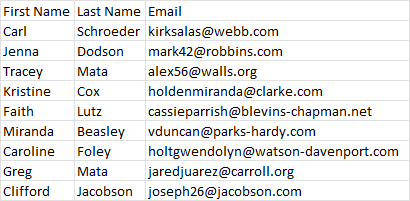


The new members' list to display the functionality of the function is extracted from the downloaded dataset from https://www.datablist.com/learn/csv/download-sample-csv-files with free to use license for testing purpose in this exercise.m


----------
#### ***Note:***
If try to execute a second time or repeat the same information with the same members, the code will consider the (First name, Surname, and email) together if and only "True" as a unique identifiaction for a particular member. In a real-life scenario, the address, and birthdays with the names will be defined as unique identification methods. The gender we cannot assign as it is changeable. The assessment dataset is not providing those biodata for test purposes and it is straightforward to add those fields to the condition verification into member_exists() if the data is given.

--------

In [27]:


def new_membership_cards_to_new_members(new_member_data, members):
    """
    Registers new members from a list of member data, issues new membership cards, and updates the members' storage.
    Each member's data includes first name, last name, and email. The function checks for duplicate members based on
    these attributes before registration.

    Parameters:
        new_member_data (list of tuples): Each tuple contains (first_name, last_name, email) for a new member.
        members (dict): A dictionary to store Member objects, keyed by member ID.

    Remarks:
    - Adds new Member objects to the `members` dictionary if they do not already exist.
    - Issues a new membership card for each newly registered member.
    - Calls an external function to update the storage (e.g., a JSON file) after registering each member.
    - Prints details of each registration process and any errors in case of duplicates.

    Prints:
        Details of each registration process and any errors in case of duplicates.
    """

    # Function to check if a member with the same first name, last name, and email already exists
    def member_exists(first_name, last_name, email, members):
        return any(member.first_name == first_name and member.last_name == last_name and member.email == email for member in members.values())

    
    print("===============================================================================================================")
    print("\033[1mList of registered New members and details followed by complete list of members in order of member numbers\033[0m")
    print("===============================================================================================================")
    last_member_number = len(members)
    
    for i, (first_name, last_name, email) in enumerate(new_member_data, start=1):
        new_member_id = f"{last_member_number + i}"
        new_member = Member(new_member_id, first_name, last_name, email, 0, "")

        if not member_exists(first_name, last_name, email, members):
            members[new_member_id] = new_member
            new_membership_card = new_member.issue_new_membership_card()
            print("Membership Card details: ", new_membership_card)
            print("Member Number:", new_member_id)
            print("First Name:", first_name)
            print("Last Name:", last_name)
            print("Email:", email)
        else:
            print(f"Error: A member with the name {first_name} {last_name} and email {email} already exists. Please check your data.")

        # Update JSON file after registering new member
        print("---------------------------------------------------------------------------------------------------------------")
        library.update_json_files()
        print("===============================================================================================================")

    print("\nMembers List:")
    display_members(members)
    
# Define dummy data for registering new members. The tuple of new members are copied from free to use data as decribed in details above.
# Free to use any other data if required to test.
new_member_data = [
    ("Carl", "Schroeder", "kirksalas@webb.com"),
    ("Tracey", "Mata",	"alex56@walls.org"),
    ("Kristine",	"Cox",	"holdenmiranda@clarke.com"),
    ("Faith",	"Lutz",	"cassieparrish@blevins-chapman.net"),
    ("Miranda",	"Beasley",	"vduncan@parks-hardy.com"),
    ("Caroline",	"Foley",	"holtgwendolyn@watson-davenport.com"),
    ("Greg",	"Mata",	"jaredjuarez@carroll.org"),
    ("Clifford",	"Jacobson",	"joseph26@jacobson.com")
]


new_membership_cards_to_new_members(new_member_data, members)


List of registered New members and details followed by complete list of members in order of member numbers
Membership Card details:  ('201_1', 'Carl', 'Schroeder', 'kirksalas@webb.com')
Member Number: 201
First Name: Carl
Last Name: Schroeder
Email: kirksalas@webb.com
---------------------------------------------------------------------------------------------------------------
Members JSON file updated.
Membership Card details:  ('202_1', 'Tracey', 'Mata', 'alex56@walls.org')
Member Number: 202
First Name: Tracey
Last Name: Mata
Email: alex56@walls.org
---------------------------------------------------------------------------------------------------------------
Members JSON file updated.
Membership Card details:  ('203_1', 'Kristine', 'Cox', 'holdenmiranda@clarke.com')
Member Number: 203
First Name: Kristine
Last Name: Cox
Email: holdenmiranda@clarke.com
---------------------------------------------------------------------------------------------------------------
Members JSON file u

### **Testing functionality of registering new members**
Trying to reissue new membership cards to the same members again. The code will not complete it as they have been already registered and issued cards.

In [28]:
new_membership_cards_to_new_members(new_member_data, members)

List of registered New members and details followed by complete list of members in order of member numbers
Error: A member with the name Carl Schroeder and email kirksalas@webb.com already exists. Please check your data.
---------------------------------------------------------------------------------------------------------------
Members JSON file updated.
Error: A member with the name Tracey Mata and email alex56@walls.org already exists. Please check your data.
---------------------------------------------------------------------------------------------------------------
Members JSON file updated.
Error: A member with the name Kristine Cox and email holdenmiranda@clarke.com already exists. Please check your data.
---------------------------------------------------------------------------------------------------------------
Members JSON file updated.
Error: A member with the name Faith Lutz and email cassieparrish@blevins-chapman.net already exists. Please check your data.
----------

----------
## **Task 4**
#### **<u>A book Reservation</u>**

(Task description from the Assingment 2)

Provide the functionality to allow a member to reserve a book. A docstring’s absence here will not be penalized. Their notfication must be that the book has been reserved or that it is on the shelves and available for loan. Use valid book numbers. Provide examples of books that can and cannot be reserved. Create a new JSON file for this task called reserved.json. Use dummy data to test the code. A notification is required when a reserved book becomes available. See Task 5.

-------

I am demonstrating here in conjunction with loan RETURN and brought forward allowing members for RESERVATION from Task 4 and RESERVATION NOTIFICATION from Task 5 into one place, as both are one integral system of RESERVATION. The whole process including BORROWING is interconnected, I am using here the same members what they borrowed in Task 1 and what they returned. Allowing members to reserve and then generating a notification of once the reserved book is returned.

-------


In [29]:
def reserve_books(library, reservation_member_ids, reservation_book_numbers, smtp_server):
    """
    Reserve books scenario.

    This function reserves books for members based on provided member IDs and book numbers.
    It also sends an email notification for each successful reservation using a dummy SMTP server.

    Args:
        library (Library): The library object that manages books and members.
        reservation_member_ids (list of str): List of member IDs.
        reservation_book_numbers (list of str): List of book numbers.
        smtp_server (DummySMTPServer): The dummy SMTP server to send notifications.
    """
    print("===============================================================================================================")
    for member_id, book_number in zip(reservation_member_ids, reservation_book_numbers):
        result = library.reserve_book(member_id, book_number)  # Assume this method returns a result or book object
        if result:
            member = library.members.get(member_id)  # Assume library has a 'members' dictionary
            book = library.books.get(book_number)  # Assume library has a 'books' dictionary
            message = f"Dear {member.first_name}, you have successfully reserved '{book.title}'."
            smtp_server.outbox("library@library.com", member.email, message)
            print(f"Reservation successful for Member ID: {member_id}, Book Number: {book_number}")
        else:
            print(f"Reservation failed for Member ID: {member_id}, Book Number: {book_number}")
        print("---------------------------------------------------------------------------------------------------------------")
    print("===============================================================================================================")


In [30]:
def reservation_with_dummy_data(library, reservation_member_ids, reservation_book_numbers):
    """
    Conducts a test scenario using specified member IDs and book numbers to simulate book reservation processes
    in a library system. This test validates the functionality of the book reservation system under controlled,
    predefined conditions.

    Preconditions:
    - 'library' is an instance of the Library class and has been properly initialized with books and members.
    - 'reservation_member_ids' and 'reservation_book_numbers' provide the IDs of members and books to be reserved.
    - The Library object is initialized with necessary data and ready for operations.

    Postconditions:
    - Book reservations are executed for the given member IDs and book numbers.
    - Results of the reservations are validated against expected outcomes, ensuring no duplicate or invalid reservations.
    - The Library's data files are updated post-reservation attempts, and email notifications are handled via a DummySMTPServer.

    Parameters:
        library (Library): The library object where the reservations are to be made.
        reservation_member_ids (list of str): A list of member IDs who are attempting to reserve books.
        reservation_book_numbers (list of str): A list of book numbers that are being reserved by the members.

    The function orchestrates the book reservation process using the provided member IDs and book numbers,
    updates the library's data accordingly, and handles email notifications through a simulated SMTP server.
    """
    # Create an instance of DummySMTPServer
    dummy_smtp_server = DummySMTPServer()
    
    # Reserve books based on the provided lists
    reserve_books(library, reservation_member_ids, reservation_book_numbers, dummy_smtp_server)

    # Update library JSON files to reflect changes
    library.update_json_files()

    # Optionally, print out sent emails for verification
    dummy_smtp_server.print_sent_emails()


#### **Testing:**
Testing to reserve for existing members and books. An email will be sent to the members to notify the successful reservation.

In [31]:
reservation_with_dummy_data(library,["10", "15", "20"],["1", "2", "3"])

Book 'Fundamentals Of Wavelets' is now borrowed by Arianna Watson, not just reserved.
Books JSON file updated.
Members JSON file updated.
Reservation successful for Member ID: 10, Book Number: 1
---------------------------------------------------------------------------------------------------------------
Book 'Data Smart' is now borrowed by Maddie Anderson, not just reserved.
Books JSON file updated.
Members JSON file updated.
Reservation successful for Member ID: 15, Book Number: 2
---------------------------------------------------------------------------------------------------------------
Book 'God Created The Integers' is now borrowed by Kelsey Morrison, not just reserved.
Books JSON file updated.
Members JSON file updated.
Reservation successful for Member ID: 20, Book Number: 3
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
From: library@library.com
To: a.watson@

#### **Testing:**
Trying to reserve again the same books for the same members. The code will not complete the task as the same members have already reserved the books.

In [32]:
reservation_with_dummy_data(library,["10", "15", "20"],["1", "2", "3"])

Book 'Fundamentals Of Wavelets' has been reserved by Arianna Watson.
Reservation successful for Member ID: 10, Book Number: 1
---------------------------------------------------------------------------------------------------------------
Book 'Data Smart' has been reserved by Maddie Anderson.
Reservation successful for Member ID: 15, Book Number: 2
---------------------------------------------------------------------------------------------------------------
Book 'God Created The Integers' has been reserved by Kelsey Morrison.
Reservation successful for Member ID: 20, Book Number: 3
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
From: library@library.com
To: a.watson@randatmail.com
Message: Dear Arianna, you have successfully reserved 'Fundamentals Of Wavelets'.
-------------------end of line--------------------
From: library@library.com
To: m.anderson@randatmail.com
Mes

#### **Testing:**
Testing the functionality of the Reservation after Borrowing:

In [33]:

print("===============================================================================================================")
print("\033[1mBOOKS BORROWING BY MEMBERS\033[0m")
borrow_books_with_dummy_data(library, ["50", "55", "60"], ["15", "18", "29"] )



BOOKS BORROWING BY MEMBERS
Books JSON file updated.
Members JSON file updated.
Book: 'The Age Of Wrath', book number: 15 by Abraham Eraly, published by Penguin   has been borrowed by Adrianna Walker.
Books borrowed by member 50 (Adrianna Walker): True
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
Book: 'Data Mining Handbook', book number: 18 by Robert Nisbet, published by Apress   has been borrowed by Sofia Montgomery.
Books borrowed by member 55 (Sofia Montgomery): True
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
Book: 'The Complete Sherlock Holmes Vol I', book number: 29 by Arthur Conan Doyle, published by Random House   has been borrowed by Ashton Barrett.
Books borrowed by member 60 (Ashton Barrett): True
-------------------------------------------

In [34]:

print("===============================================================================================================")
print("\033[1mBOOKS RESERVING BY MEMBERS\033[0m")
reservation_with_dummy_data(library,["80", "65", "70"],["15", "18", "29"])


BOOKS RESERVING BY MEMBERS
Book 'The Age Of Wrath' has been reserved by Catherine Ferguson.
Reservation successful for Member ID: 80, Book Number: 15
---------------------------------------------------------------------------------------------------------------
Book 'Data Mining Handbook' has been reserved by Naomi Johnson.
Reservation successful for Member ID: 65, Book Number: 18
---------------------------------------------------------------------------------------------------------------
Book 'The Complete Sherlock Holmes Vol I' has been reserved by Heather Riley.
Reservation successful for Member ID: 70, Book Number: 29
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
From: library@library.com
To: c.ferguson@randatmail.com
Message: Dear Catherine, you have successfully reserved 'The Age Of Wrath'.
-------------------end of line--------------------
From: library@library

--------------
#### **Testing:**
Testing the functionality of the Reservation after Returning books:

In [35]:

print("===============================================================================================================")
print("\033[1mBOOKS RETURNING BY MEMBERS\033[0m")
print("===============================================================================================================")
return_books_with_dummy_data(library, ["40", "55", "60", "20", "86"], ["15", "18", "29", "9", "5"])



BOOKS RETURNING BY MEMBERS
Books JSON file updated.
Members JSON file updated.
Maria Thomas did not borrow 'The Age Of Wrath'.
---------------------------------------------------------------------------------------------------------------
No more reservations for this book.
Notification sent to Naomi Johnson at n.johnson@randatmail.com.
Books JSON file updated.
Members JSON file updated.
Book 'Data Mining Handbook', book number '18' has been returned by Sofia Montgomery. Total fines: £10.00
Books JSON file updated.
Members JSON file updated.
Fines for member 55: £10.00
---------------------------------------------------------------------------------------------------------------
No more reservations for this book.
Notification sent to Heather Riley at h.riley@randatmail.com.
Books JSON file updated.
Members JSON file updated.
Book 'The Complete Sherlock Holmes Vol I', book number '29' has been returned by Ashton Barrett. Total fines: £20.00
Books JSON file updated.
Members JSON file up

In [36]:
print("\033[1mBOOKS RESERVING BY MEMBERS\033[0m")
print("===============================================================================================================")
reservation_with_dummy_data(library,["80", "65", "70"],["15", "18", "29"])

BOOKS RESERVING BY MEMBERS
Book 15 has already been reserved by member 80.
Reservation failed for Member ID: 80, Book Number: 15
---------------------------------------------------------------------------------------------------------------
Book 'Data Mining Handbook' is now borrowed by Naomi Johnson, not just reserved.
Books JSON file updated.
Members JSON file updated.
Reservation successful for Member ID: 65, Book Number: 18
---------------------------------------------------------------------------------------------------------------
Book 'The Complete Sherlock Holmes Vol I' is now borrowed by Heather Riley, not just reserved.
Books JSON file updated.
Members JSON file updated.
Reservation successful for Member ID: 70, Book Number: 29
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
From: library@library.com
To: n.johnson@randatmail.com
Message: Dear Naomi, you have su

In [37]:
reservation_with_dummy_data(library,["90"],["18"])

Book 'Data Mining Handbook' has been reserved by Adam Farrell.
Reservation successful for Member ID: 90, Book Number: 18
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
From: library@library.com
To: a.farrell@randatmail.com
Message: Dear Adam, you have successfully reserved 'Data Mining Handbook'.
-------------------end of line--------------------


In [38]:
reservation_with_dummy_data(library,["100"],["18"])

Book 'Data Mining Handbook' has been reserved by Connie Gibson.
Reservation successful for Member ID: 100, Book Number: 18
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
From: library@library.com
To: c.gibson@randatmail.com
Message: Dear Connie, you have successfully reserved 'Data Mining Handbook'.
-------------------end of line--------------------


In [39]:
return_books_with_dummy_data(library, ["90"], ["18"])

Books JSON file updated.
Members JSON file updated.
Adam Farrell did not borrow 'Data Mining Handbook'.
---------------------------------------------------------------------------------------------------------------


In [40]:
borrow_books_with_dummy_data(library, ["100"], ["18"] )

Error: This book is not available for borrowing.
Books borrowed by member 100 (Connie Gibson): False
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.


In [41]:
return_books_with_dummy_data(library, ["100"], ["18"])

Books JSON file updated.
Members JSON file updated.
Connie Gibson did not borrow 'Data Mining Handbook'.
---------------------------------------------------------------------------------------------------------------


-------------
## **Task 5**
There are two notifications to be simulated.
1) Provide the functionality to notify a reserved book has become available (see Task 4).
2) Provide the functionality to notify that a returned book is late and the resultant fine (see Task 2 ) A book returned after 19 days is 5 days late and the charge is £5

#### **5.1 Notification of successful Reservation**

- Multiple books are allowed
- Multiple member reservation are allowed.
- The same book mulitple times allowed by different members.
- Different members the same book allowed.
- The same member the same book multiple times not allowed.

In [42]:
print("\033[1mBOOKS RESERVING BY MEMBERS\033[0m")
print("===============================================================================================================")
reservation_with_dummy_data(library,["120", "155", "55"],["55", "55", "55"])

BOOKS RESERVING BY MEMBERS
Book 'Dylan On Dylan' is now borrowed by Eleanor Douglas, not just reserved.
Books JSON file updated.
Members JSON file updated.
Reservation successful for Member ID: 120, Book Number: 55
---------------------------------------------------------------------------------------------------------------
Book 'Dylan On Dylan' has been reserved by Dainton Chapman.
Reservation successful for Member ID: 155, Book Number: 55
---------------------------------------------------------------------------------------------------------------
Book 'Dylan On Dylan' has been reserved by Sofia Montgomery.
Reservation successful for Member ID: 55, Book Number: 55
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
From: library@library.com
To: e.douglas@randatmail.com
Message: Dear Eleanor, you have successfully reserved 'Dylan On Dylan'.
-------------------end of line--

In [43]:
print("\033[1mBOOKS RESERVING BY MEMBERS\033[0m")
print("===============================================================================================================")
reservation_with_dummy_data(library,["130", "130", "130"],["65", "65", "65"])

BOOKS RESERVING BY MEMBERS
Book 'Crime And Punishment' is now borrowed by Joyce Baker, not just reserved.
Books JSON file updated.
Members JSON file updated.
Reservation successful for Member ID: 130, Book Number: 65
---------------------------------------------------------------------------------------------------------------
Book 'Crime And Punishment' has been reserved by Joyce Baker.
Reservation successful for Member ID: 130, Book Number: 65
---------------------------------------------------------------------------------------------------------------
Book 65 has already been reserved by member 130.
Reservation failed for Member ID: 130, Book Number: 65
---------------------------------------------------------------------------------------------------------------
Books JSON file updated.
Members JSON file updated.
From: library@library.com
To: j.baker@randatmail.com
Message: Dear Joyce, you have successfully reserved 'Crime And Punishment'.
-------------------end of line-----------

#### **5.2 Overdue Notification**

In [44]:
list_overdue_fines(library) 

List of Members with Overdue Fines:
-----------------------------------
Member ID  Name                           Fines          
1          Adelaide Cunningham            £55.00         
2          Charlie Roberts                £85.00         
3          Eric Cooper                    £45.00         
5          Darcy Howard                   £75.00         
6          Connie West                    £65.00         
7          Lyndon Ellis                   £55.00         
8          Amy Hamilton                   £50.00         
9          Kelvin Wilson                  £115.00        
10         Arianna Watson                 £45.00         
11         Lydia Farrell                  £30.00         
12         Ada Harris                     £110.00        
13         Sarah Wilson                   £110.00        
14         Nicole Phillips                £35.00         
15         Maddie Anderson                £55.00         
16         Brad Alexander                 £75.00         


I am demonstrating here loan RETURN and brought forward allowing members for RESERVATION from Task 4 and RESERVATION NOTIFICATION from Task 5 into one place. The whole process including BORROWING is interconnected, I am using here the same members what they borrowed in Task 1 and what they returned. Allwoing members to reserve and then genererating a notification of once the reserved book is returned.





=============================================================================================
## **Future Development and modifications:**

While already I had given some future development avenues with every **Class** in the project the following is the summary of options could be taken in future:

=============================================================================================

Concerning future development, the most important aspect is to maintain the correct architecture of this project. Using OOP the biggest advantage is that always we can keep introducing new classes and methods without interfering the functional behavior of this code.

In that scenario, it is very important to have proper documentation for future developers to refer to. Generally, the documentation is about 10%-30% of the whole code base.
Most of the documentation I achieved at the beginning rather than at the end. The areas where still could I improve. The following are areas where I could have done better:

1. **Complete documentation:** for all the functions with flow diagrams for complex logic operations.
2. **The reservation system:** could be used other methods where the opportunity to decouple from the classes which is a major recommendation in CS. A separate JSON file and maintain members' queue details concerning a particular book.
3. **scan() method:** Incorporate scan() method when borrowing and returning or using other areas where the user interaction is presence.
4. **Payment calculation:** Member pays against the due and the balance carries forward. Again we need a separate JSON file to maintain the running balance of members' dues. Once a payment is made issue an receipt.
5. **Notification:** could be coupled up with the DummySMTPServer class and have a lookup table to send an appropriate notification.
6. **Calculation of fines:** incorporate with present time 'now()' and calculate active fine with the related book. Currently, the calculation is strictly based on total fines based on virtual returned dates. This is a major flow of fine calculations here as not taking into account if any particular book was borrowed and late within the project. (saving the JSON file into the hard disk is important in such a scenario.)


------

#### **System specific future developments:**


**Notifications:**
* To improve the extensibility of the notification system, it is suggested to consider decoupling the notification logic from the main library class. Instead of hardcoding the notification behavior directly into the library methods, could be created a separate notification service or class that handles all notifications.
* This way, if I need to add more notification types or change the notification behavior in the future, it is easier do so without modifying the library class itself.
* Additionally, using a separate notification service allows to easily switch between different notification methods (e.g., email, SMS, push notification) or integrate with external notification services.

**A Notification class:**  This class will be responsible for handling all notifications.
* **Separate Notification Service:** Instead of embedding notification logic directly into the library class, create a separate notification service or class.
* **Dependency Injection:** The library class should not be directly responsible for sending notifications. Instead, it should rely on the notification service to handle notifications. This can be achieved through dependency injection, where the library class accepts an instance of the notification service as a parameter.
* **Interface or Abstract Class:** Define an interface or abstract class for the notification service. This allows to define a contract that all notification services must adhere to. For example, define methods like "send_email_notification", "send_sms_notification", etc.
* **Flexible Configuration:** Make the notification service configurable so that you can easily switch between different notification methods or integrate with external notification services. This can be done through configuration settings or by using a factory pattern to create instances of varying notification services based on configuration.
* **Lookup Method:** Implement a lookup mechanism to determine which notification method to use for each event. This could involve looking up configuration settings, user preferences, or other criteria to determine the appropriate notification method for each event.
* **.JSON** Creating another json file to collect members' reservation information is another method (as specified by this assessment). Creating a .json file to store members' information with the book number, and queue number for that particular book can be prioritized whom to issue the book when the book is available. Once issue a book change the prioritising number order again from 1. Is a simple process which helps again to decouple with classes and increase the extensibility and flexibility. 
  
By decoupling the notification logic from the main library class and following these principles, the system will be more flexible, maintainable, and extensible. Easily could be added new notification methods, switch between different notification services, and adapt to changing requirements without having to modify the core library functionality. Additionally, this approach allows for easier testing and integration with external systems.

**Payments:** I have not completed the payments, paying off until the debts are cleared or an accounting system. I have started some payment methods, but it is better to have a separate class again for the payments and it is not a requirement in this project.

#### **Software architectural and system modifications for Future:**

* **Automated Testing:** This could involve unit tests for individual methods and integration tests that simulate user interactions with the system. At the initial stages, I implemented that method of user interaction but ditched it due to not being in the scope of this project. Testing frameworks like "unittest" in Python can be quite effective for this.
* **Data Validation:** To ensure that the data input into the system is validated both format-wise and logically. This includes checking that emails are in a valid format, names contain appropriate characters, and member IDs are unique and correctly formatted. Again this is not tested in this project.
* **Error Handling:** Continue to refine error handling strategies to manage unexpected input and system states gracefully. Proper error handling can prevent the application from crashing and provide users with helpful error messages.
* **Logging:** Implement logging to keep track of operations, especially those that modify data. This can help in diagnosing problems after they occur and in understanding the behavior of the system during testing and deployment.
* **Performance Optimization:** As the library grows, keep an eye on the performance of the operations, particularly those that iterate over large datasets like members or books. Optimization may involve refining algorithms or utilizing more efficient data structures.
* **User Interface:** If the application will have a user interface, start planning how users will interact with it. The functionality needs to be accessible and user-friendly, with clear navigation and input validation. Flow diagram could be helpful.
* **Security Measures:** If the system will eventually handle real user data, consider security implications, including data encryption for storage and secure communication protocols if there is a network component and multi-level user access privileges.
* **Documentation:** Continue documenting the code and its usage. Good documentation can be invaluable for maintenance, future development, and other developers who may work with the code.
* **Backup and Recovery:** Implement strategies for data backup and recovery to protect against data loss. Regular backups and a clear plan for restoring data after a loss can mitigate the impact of system failures. Using reputed cloud storage is an option.
* **Continuous Improvement:** Even with the system functioning as expected now, software development is an iterative process. Keep refining, testing, and improving the system based on user feedback and as new requirements emerge.

  ---------------

*Literature and information: refer to various online/printed sources and resources listed and unlisted.*
- Robert Martin - Clean Code - A Handbook of Agile Software Craftsmanship - 2008
- https://librarytechnology.org
- https://exlibrisgroup.com/products/alma-library-services-platform
- other various online resources.

========================================================
------------

Completed by: **Ajantha Wirasinghe**  &emsp; Keele Student number: **24027813** &emsp;  Date: **28/04/2024**

--------

